# Variable Explanation

**Date**: The calendar date for that particular record.

**Open_Price**: The price of the cryptocurrency at the beginning of the day. What price did the market open with?

**High_Price**: The highest price the cyrptocurrency reached during the day.

**Low**: The lowest price the cyrptocurrency dropped to during the day.

**Close_Price**: The price of the cryptocurrency at the end of the day. What price did the market close with?

**Volume**: The total number of coins (or value in currency) traded during the day.

**Moving_Avg_7**: The 7-day moving average of the closing price.

**Moving_Avg_30**: The 30-day moving average of the closing price.

**Volatility**: A measure of how much the price fluctuates during the day. High value means large swings in prices within the same day, a quality the cryptocurrency seems to own.

**RSI (Relative Strength Index)**
- RSI > 70: Asset is considered overbought (might go down soon). Suggests a *sell* opportunity as an asset's price may be temporarily high and could be due for a price correction or reversal.
- RSI < 30: Asset is considered oversold (might go up soon). Suggests a *buy* opportunity as the price may be undervalued or due for a rebound.

---




# Loading All Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning, InterpolationWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', InterpolationWarning)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ConvergenceWarning, InterpolationWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', InterpolationWarning)


# Cryptocurrency Dataset

explanation of data, Where is it from, variables it uses, what is our main aim, problem statememnt


In [3]:
df_orignal = pd.read_csv("synthetic_cryptocurrency_data.csv")

In [4]:
df = pd.read_csv("synthetic_cryptocurrency_data.csv")
df.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI
0,1990-01-01,50381.597367,52295.056945,48754.706054,49450.823866,2476,49450.823866,49450.823866,0.025218,54.235666
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906


In [5]:
df.tail()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI
12779,2024-12-27,117.102575,121.878469,112.272173,120.910268,2270,120.910268,120.910268,0.012203,49.946526
12780,2024-12-28,123.104449,125.388820,120.141140,121.204500,2741,121.204500,121.204500,0.017146,49.822822
12781,2024-12-29,119.850087,122.640875,116.604937,122.229445,2482,122.229445,122.229445,0.033753,65.597361
12782,2024-12-30,119.884123,121.118010,115.927387,121.034970,1738,121.034970,121.034970,0.090237,41.932424
12783,2024-12-31,119.755156,125.066714,116.092776,123.943972,3989,123.943972,123.943972,0.093703,52.790649


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12784 non-null  object 
 1   Open_Price     12784 non-null  float64
 2   High_Price     12784 non-null  float64
 3   Low_Price      12784 non-null  float64
 4   Close_Price    12784 non-null  float64
 5   Volume         12784 non-null  int64  
 6   Moving_Avg_7   12784 non-null  float64
 7   Moving_Avg_30  12784 non-null  float64
 8   Volatility     12784 non-null  float64
 9   RSI            12784 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 998.9+ KB


# Data Visualisation (Literally)

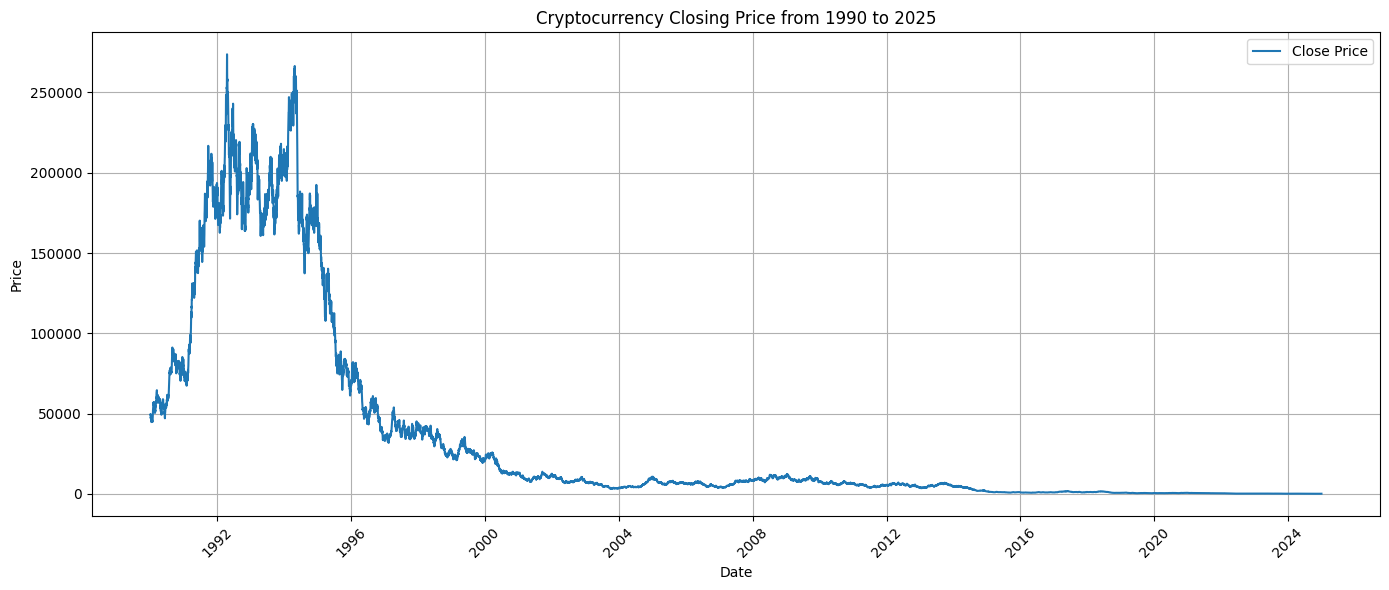

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the Close Price and existing 30-day Moving Average
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close_Price'], label='Close Price')

plt.title('Cryptocurrency Closing Price from 1990 to 2025')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Trimmed Dataset - it's not at zero, actually

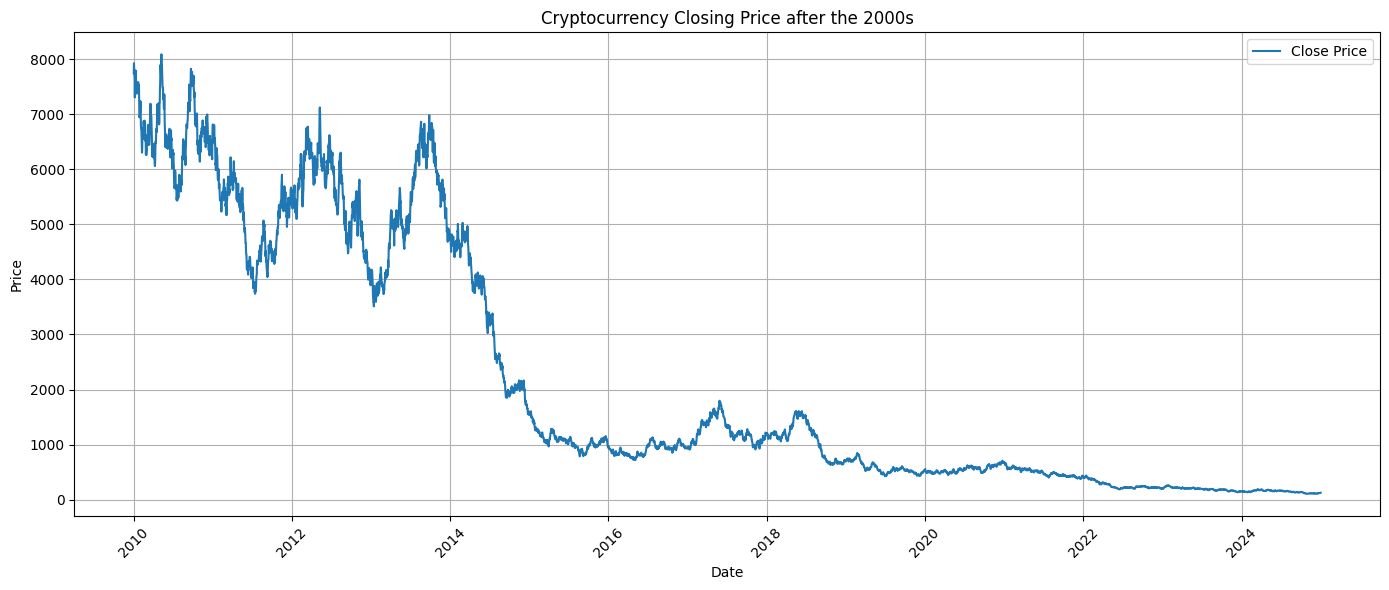

In [8]:
df_recent = df[df['Date'] >= '2010-01-01']
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' is in datetime format
df_recent['Date'] = pd.to_datetime(df['Date'])

# Plotting the Close Price and existing 30-day Moving Average
plt.figure(figsize=(14,6))
plt.plot(df_recent['Date'], df_recent['Close_Price'], label='Close Price')

plt.title('Cryptocurrency Closing Price after the 2000s')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis: Get to know our data!

## Distribution Plots

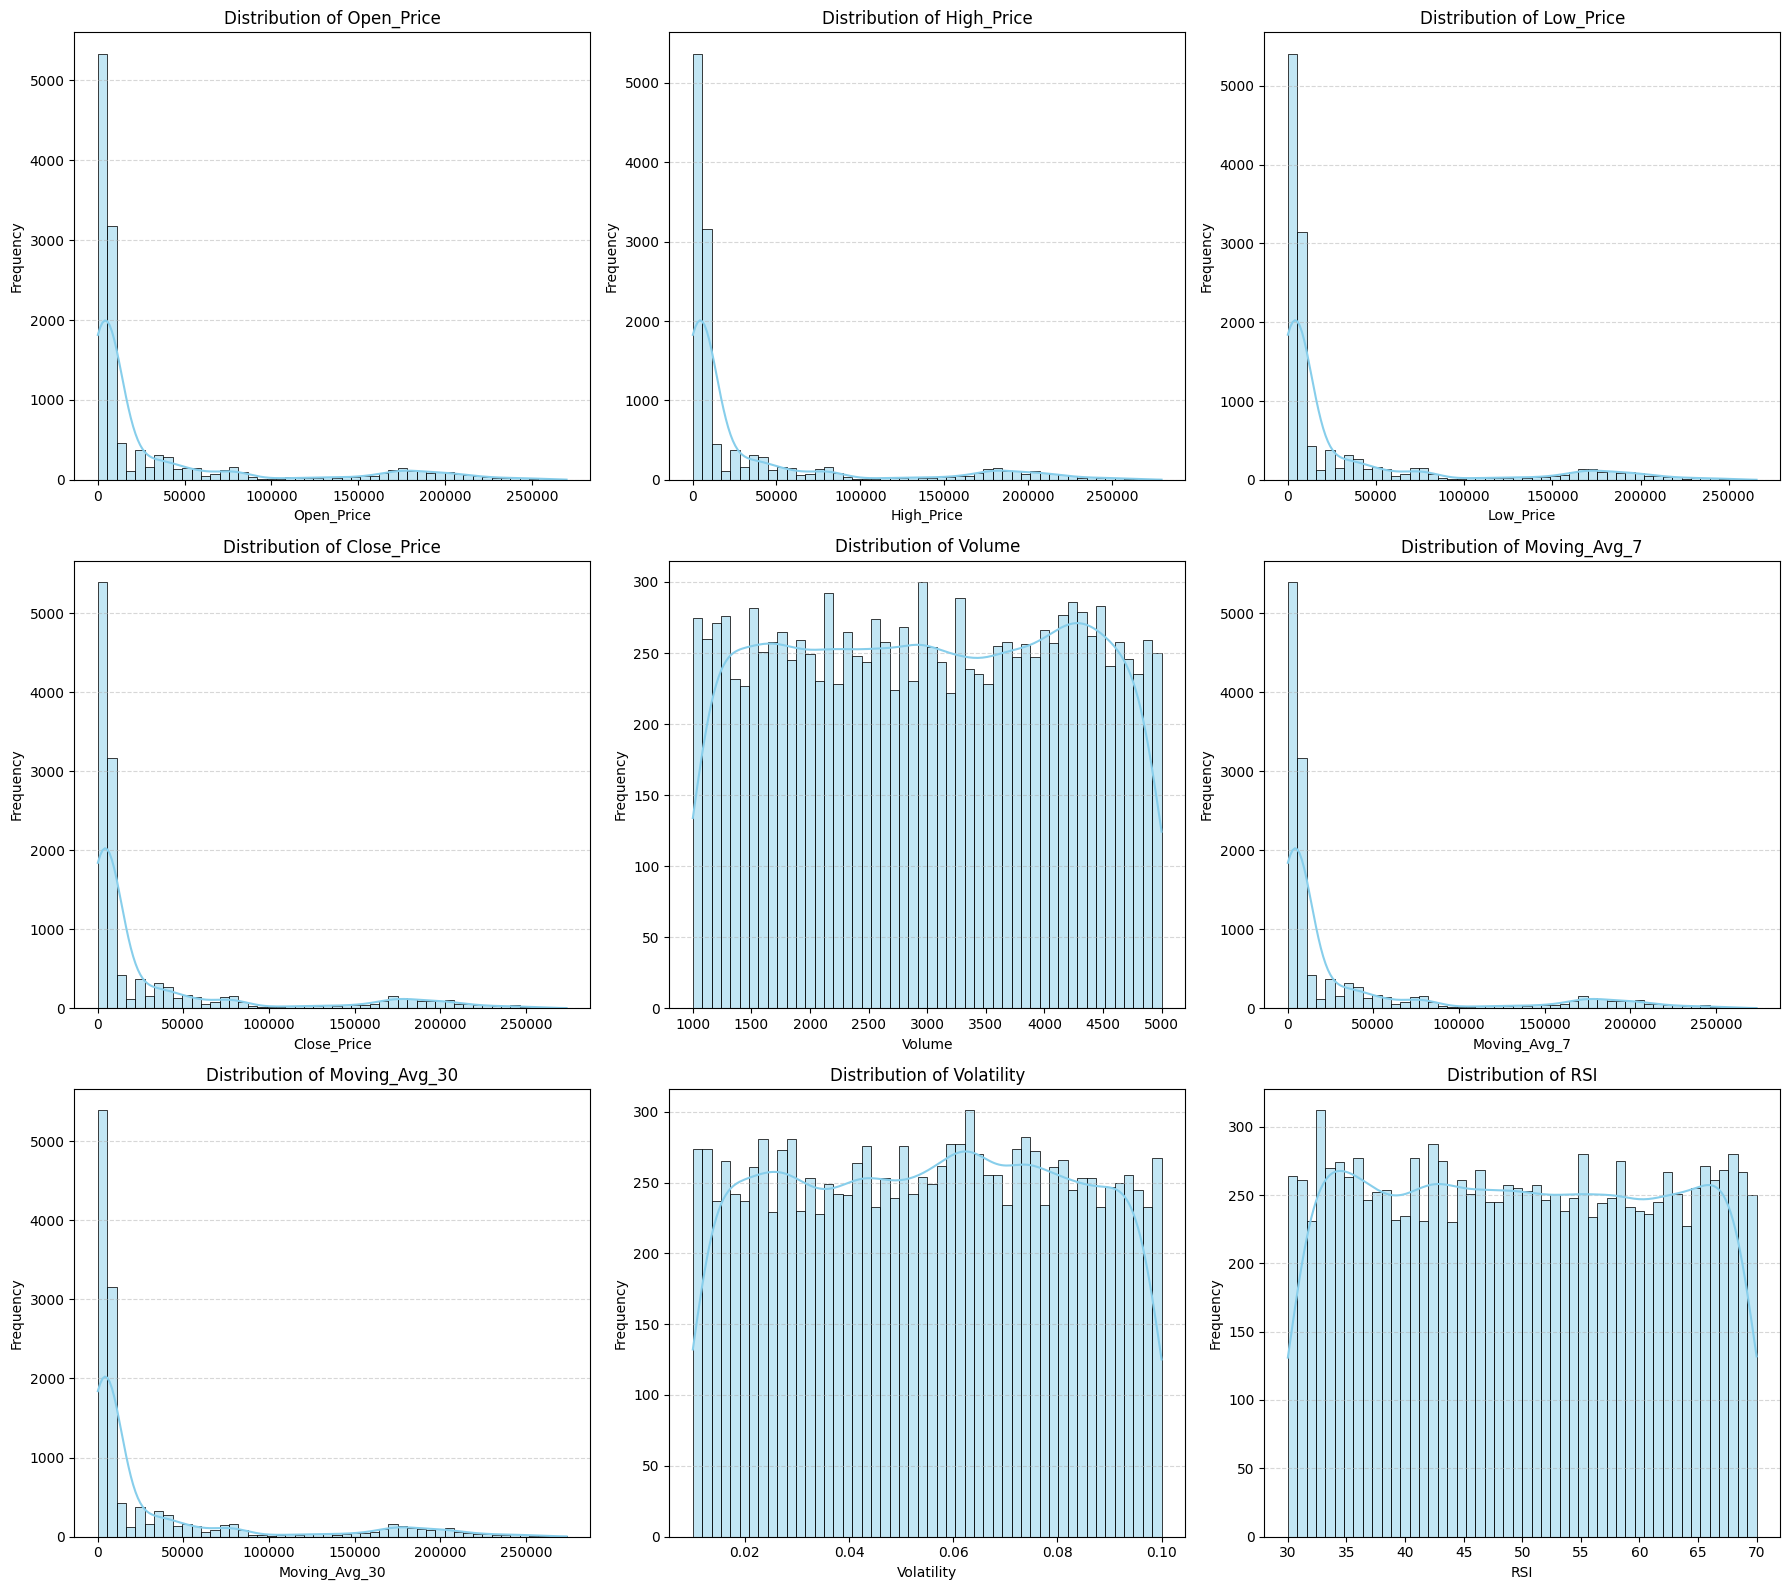

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features to plot
features = [
    'Open_Price', 'High_Price', 'Low_Price', 'Close_Price', 'Volume',
    'Moving_Avg_7', 'Moving_Avg_30', 'Volatility', 'RSI'
]

# Set up the plot grid
plt.figure(figsize=(18, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


 The moving average and momentum-based features, such as the RSI, help smooth out these fluctuations and highlight periods of market strength or weakness. The histogram plots confirm the presence of outliers and heavy-tailed distributions in price and volume, which are typical of high-risk, high-reward asset classes like cryptocurrencies.

## RSI Value Exploration

1. How many unique days per RSI level (overbought, oversold and general)

In [10]:
print("Min RSI:", df['RSI'].min())
print("Max RSI:", df['RSI'].max())
print(" ")


# Round the RSI values to the nearest integer and categorize
df['RSI_Rounded'] = df['RSI'].round().astype(int)

# Now categorize RSI into 'Overbought', 'Oversold', and '?' based on the rounded values
df['RSI_Label'] = df['RSI_Rounded'].apply(
    lambda x: 'Overbought' if x >= 70 else ('Oversold' if x <= 30 else '?')
)

# Group by the new RSI_Label and count unique dates
rsi_date_counts = df.groupby('RSI_Label')['Date'].nunique().sort_values(ascending=True)

# Print the result
print(rsi_date_counts)


Min RSI: 30.001107494522287
Max RSI: 69.99814671168551
 
RSI_Label
Overbought      158
Oversold        172
?             12454
Name: Date, dtype: int64


2. Average closing rate of per RSI level

In [11]:
# Print Min and Max RSI values
print("Min RSI:", df['RSI'].min())
print("Max RSI:", df['RSI'].max())
print(" ")

# Create a 'Year' column
df['Year'] = df['Date'].dt.year

# Group by two-year periods
df['Two_Year_Period'] = (df['Year'] // 2) * 2


# Round the RSI values to the nearest integer and categorize
df['RSI_Rounded'] = df['RSI'].round().astype(int)

# Categorize RSI into 'Overbought', 'Oversold', and '?' based on the rounded values
df['RSI_Label'] = df['RSI_Rounded'].apply(
    lambda x: 'Overbought' if x >= 70 else ('Oversold' if x <= 30 else '?')
)

# Group by the new RSI_Label and count unique dates
rsi_date_counts = df.groupby('RSI_Label')['Date'].nunique().sort_values(ascending=True)

# Print the RSI date counts
print(rsi_date_counts)

# Calculate the average closing price for each RSI category
average_close_price = df.groupby('RSI_Label')['Close_Price'].mean().sort_values(ascending=True)

# Print the average closing price
print("\nAverage Closing Price for each RSI category:")
print(average_close_price)

# Calculate the average closing price for each 'Two_Year_Period' and 'RSI_Label'
average_close_price = df.groupby(['Year', 'RSI_Label'])['Close_Price'].mean().sort_index()

# Print the average closing price per year and RSI category
print("\nAverage Closing Price for each RSI category per year:")
print(average_close_price)


Min RSI: 30.001107494522287
Max RSI: 69.99814671168551
 
RSI_Label
Overbought      158
Oversold        172
?             12454
Name: Date, dtype: int64

Average Closing Price for each RSI category:
RSI_Label
Overbought    32083.752859
?             33610.001032
Oversold      36392.150848
Name: Close_Price, dtype: float64

Average Closing Price for each RSI category per year:
Year  RSI_Label 
1990  ?              66019.364795
      Overbought     66440.048047
      Oversold       59216.593006
1991  ?             148206.590936
      Overbought     97379.389175
                        ...      
2023  Overbought       213.158875
      Oversold         165.966543
2024  ?                143.994070
      Overbought       139.944349
      Oversold         146.467510
Name: Close_Price, Length: 105, dtype: float64


Note the difference between the global average of the Closing_Price per RSI level and the two-year average. The **decreasing trend** is quite evident in the values.

3. Average Closing Price per Year with RSI Label Trends

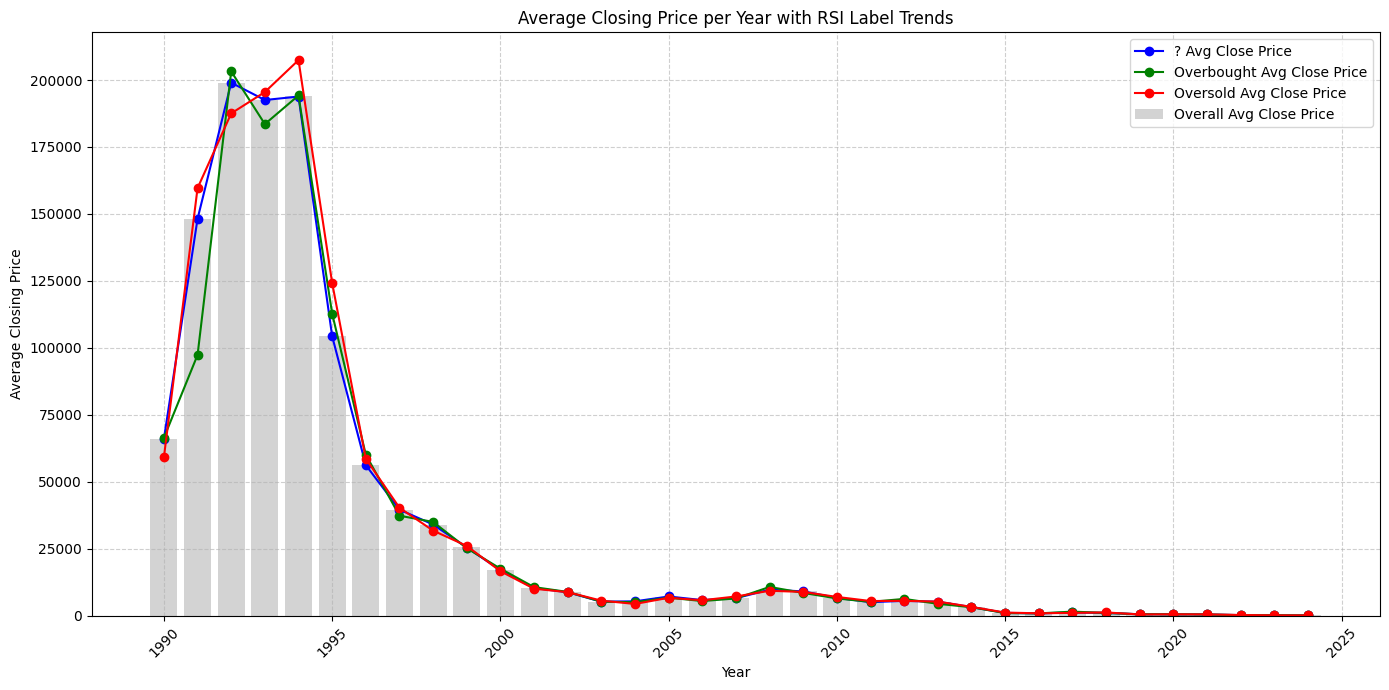

In [12]:
import matplotlib.pyplot as plt

# --- Bar graph data: overall average closing price per year ---
average_close_price = df.groupby('Year')['Close_Price'].mean()

# --- Line graph data: average closing price per year for each RSI label ---
avg_close_per_year_rsi = df.groupby(['Year', 'RSI_Label'])['Close_Price'].mean().unstack()

# Plotting
plt.figure(figsize=(14, 7))

# Bar plot for total average closing price per year
plt.bar(average_close_price.index, average_close_price.values,
        color='lightgray', label='Overall Avg Close Price')

# Line plots for each RSI label
colors = {'Overbought': 'green', 'Oversold': 'red', '?': 'blue'}
for label in avg_close_per_year_rsi.columns:
    plt.plot(avg_close_per_year_rsi.index, avg_close_per_year_rsi[label],
             marker='o', label=f'{label} Avg Close Price', color=colors[label])

# Labels, title, and grid
plt.title('Average Closing Price per Year with RSI Label Trends')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


- The chart shows the yearly average closing price alongside RSI-labeled trends (Overbought, Oversold, ?) from 1990 to 2024.

- There was a clear price peak between 1992–1995, followed by a sharp decline and long-term stagnation after 2000.

- Across all years, RSI-based averages mostly follow the overall price trend, indicating RSI states didn’t significantly disrupt the market direction.

- The data highlights a boom-bust cycle typical of speculative assets, with RSI states offering limited early signals for major shifts.

##  Period and other variable explorations

In [13]:
print("Period covered in dataset:", df['Date'].min(), "to", df['Date'].max())

Period covered in dataset: 1990-01-01 00:00:00 to 2024-12-31 00:00:00


Our dataset

In [14]:
from itertools import combinations

cols = ['Date', 'Open_Price', 'High_Price', 'Low_Price', 'Close_Price',
        'Volume', 'Moving_Avg_7', 'Moving_Avg_30', 'Volatility', 'RSI']

for r in range(1, 4):  # Choose combos of 1 to 3 variables
    for combo in combinations(cols, r):
        group_size = df.groupby(list(combo)).ngroups
        print(f"Time series groups for {combo}: {group_size}")


Time series groups for ('Date',): 12784
Time series groups for ('Open_Price',): 12784
Time series groups for ('High_Price',): 12784
Time series groups for ('Low_Price',): 12784
Time series groups for ('Close_Price',): 12784
Time series groups for ('Volume',): 3833
Time series groups for ('Moving_Avg_7',): 12784
Time series groups for ('Moving_Avg_30',): 12784
Time series groups for ('Volatility',): 12784
Time series groups for ('RSI',): 12784
Time series groups for ('Date', 'Open_Price'): 12784
Time series groups for ('Date', 'High_Price'): 12784
Time series groups for ('Date', 'Low_Price'): 12784
Time series groups for ('Date', 'Close_Price'): 12784
Time series groups for ('Date', 'Volume'): 12784
Time series groups for ('Date', 'Moving_Avg_7'): 12784
Time series groups for ('Date', 'Moving_Avg_30'): 12784
Time series groups for ('Date', 'Volatility'): 12784
Time series groups for ('Date', 'RSI'): 12784
Time series groups for ('Open_Price', 'High_Price'): 12784
Time series groups for 

In [15]:
# Create time-related columns from the 'Date' column. Year already created for RSI Label
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.dayofyear
df['weekday'] = df['Date'].dt.weekday  # Monday = 0, Sunday = 6
df['year_month'] = df['Date'].apply(lambda x: f"{x.year}-{x.month:02d}")  # cleaner format like 2021-07


In [16]:
df.head(10)

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,RSI_Rounded,RSI_Label,Year,Two_Year_Period,month,day,weekday,year_month
0,1990-01-01,50381.597367,52295.056945,48754.706054,49450.823866,2476,49450.823866,49450.823866,0.025218,54.235666,54,?,1990,1990,1,1,0,1990-01
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,44,?,1990,1990,1,2,1,1990-01
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,65,?,1990,1990,1,3,2,1990-01
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,68,?,1990,1990,1,4,3,1990-01
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,45,?,1990,1990,1,5,4,1990-01
5,1990-01-06,47038.899406,48328.326956,45984.969970,47100.006337,2961,47100.006337,47100.006337,0.059547,30.119253,30,Oversold,1990,1990,1,6,5,1990-01
6,1990-01-07,47560.256183,48177.137347,46828.847897,46948.621699,3436,46948.621699,46948.621699,0.037968,31.883621,32,?,1990,1990,1,7,6,1990-01
7,1990-01-08,47064.433596,48964.806425,45798.151972,46918.497087,3715,46918.497087,46918.497087,0.063410,58.094563,58,?,1990,1990,1,8,0,1990-01
8,1990-01-09,47401.704712,49695.260432,46547.483792,47090.724427,1652,47090.724427,47090.724427,0.045035,40.302781,40,?,1990,1990,1,9,1,1990-01
9,1990-01-10,46466.613400,47917.118424,45796.733759,46328.708145,1835,46328.708145,46328.708145,0.038600,67.138831,67,?,1990,1990,1,10,2,1990-01


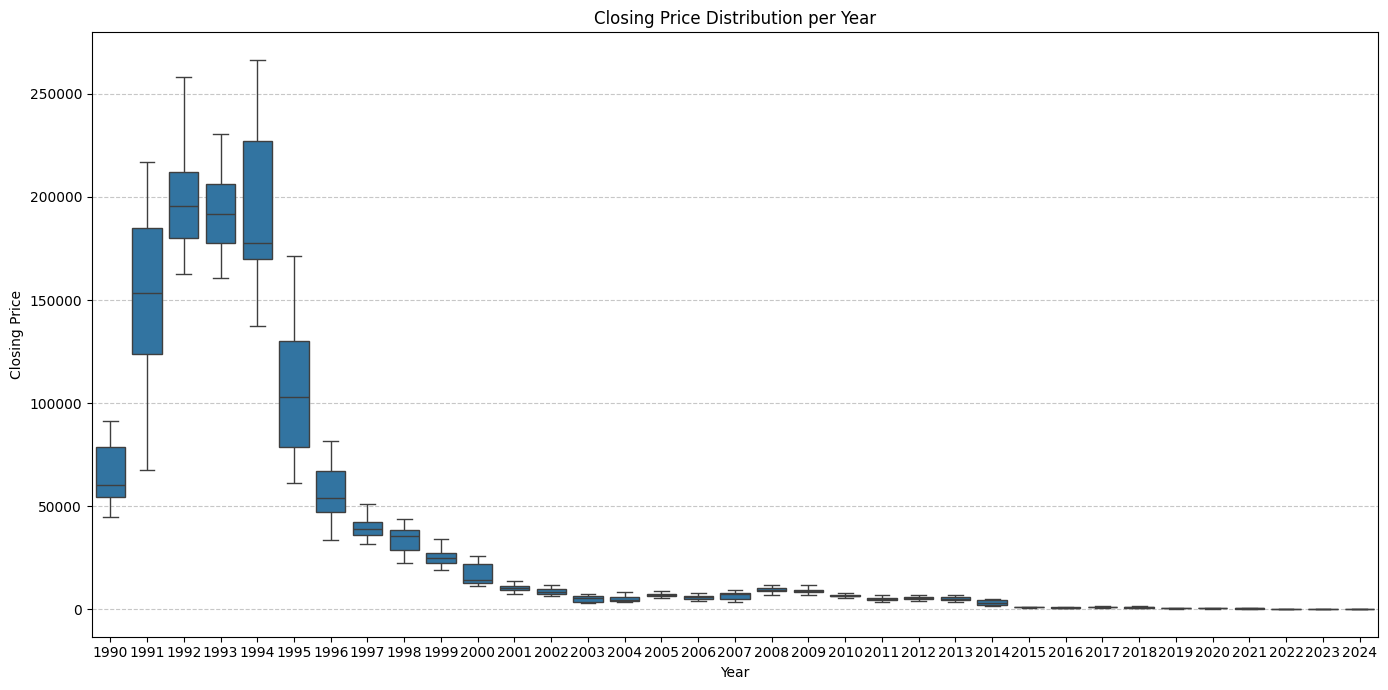

In [17]:
plt.figure(figsize=(14, 7))

# Base boxplot: distribution of daily closing prices per year
sns.boxplot(data=df, x='Year', y='Close_Price', showfliers=False)


# Formatting
plt.title('Closing Price Distribution per Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1. 1990–1995: Extremely High and Volatile Prices

- The boxes are tall and the whiskers wide, meaning there was a high spread in daily prices.

- The median was high, and the range stretched significantly — this suggests major volatility.

- Prices in these years fluctuated between very large ranges, typical of an immature or highly speculative market phase.

2. 1996–2000: A Gradual Decline in Median and Spread

- Both the median price and the interquartile range (IQR) are shrinking.

- The crypto market seems to have cooled off during this period, with less frequent wild price swings.

3. 2001–2010: Stable and Low Prices

- The boxes become flat and compressed.

- Prices stabilized at lower levels, indicating the asset entered a period of low volatility and market dormancy.

- Suggests less trading activity or speculative interest.

4. 2011–2024: Almost Flat Prices

- Boxplots are tiny and hover very close to zero.

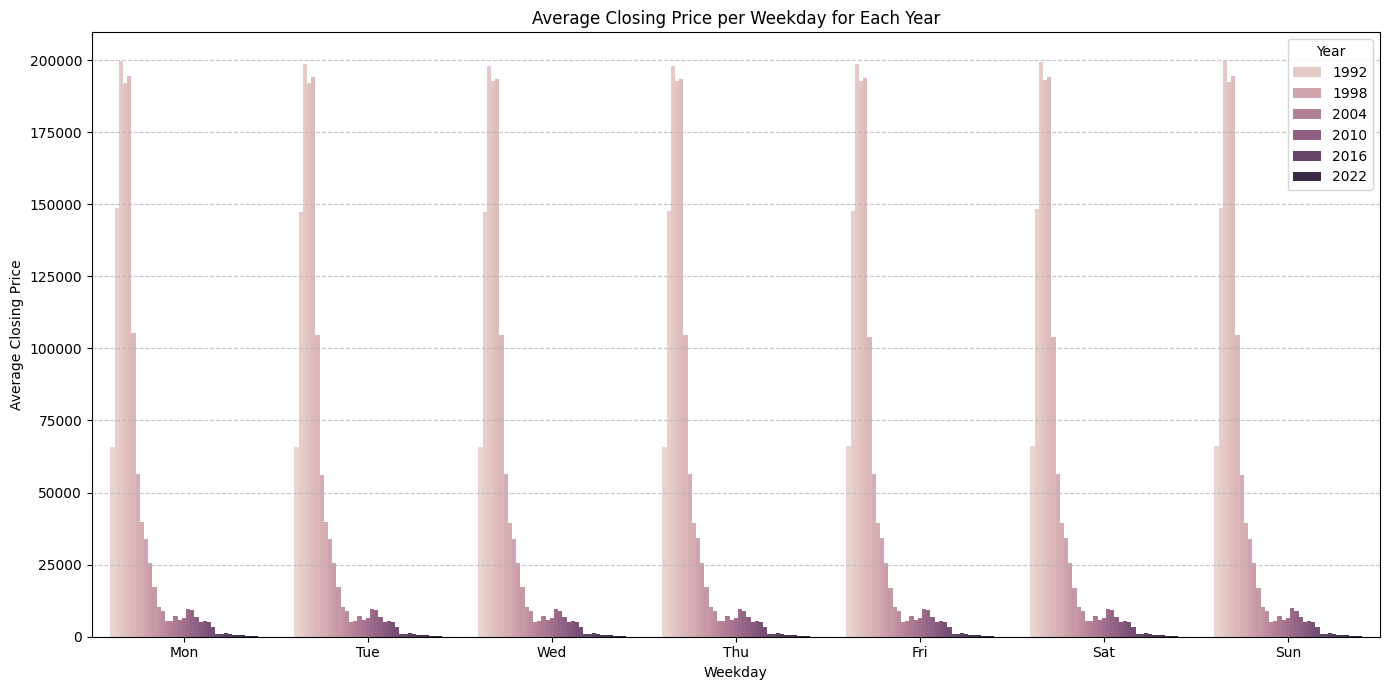

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map weekday numbers to names for readability
df['weekday_name'] = df['weekday'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

# Group by Year and Weekday
grouped = df.groupby(['Year', 'weekday_name'])['Close_Price'].mean().reset_index()

# Sort weekday for consistent display
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot using seaborn for grouped bars
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='weekday_name', y='Close_Price', hue='Year', order=weekday_order)

# Formatting
plt.title('Average Closing Price per Weekday for Each Year')
plt.xlabel('Weekday')
plt.ylabel('Average Closing Price')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The plot shows average closing prices by weekday across selected years (1992–2022).

- Prices are consistently highest for all weekdays in 1992, gradually decreasing over the years — especially clear by 2022.

- No particular weekday shows a strong price bias — the price level appears largely uniform across Monday to Sunday within the same year.

- The chart highlights a long-term market decline rather than any significant weekday effect.

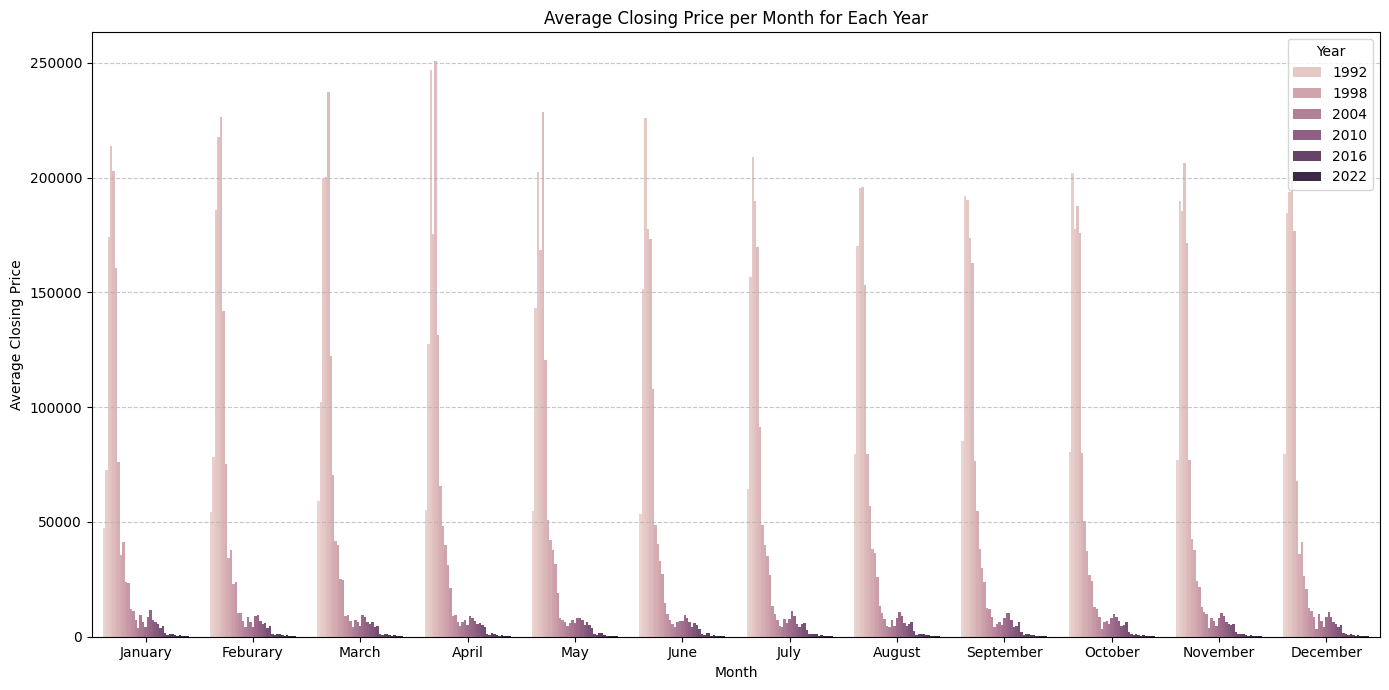

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map weekday numbers to names for readability
df['month_name'] = df['month'].map({
    1: 'January', 2: 'Feburary', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Group by Year and Weekday
grouped = df.groupby(['Year', 'month_name'])['Close_Price'].mean().reset_index()

# Sort weekday for consistent display
month_order = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot using seaborn for grouped bars
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x='month_name', y='Close_Price', hue='Year', order=month_order)

# Formatting
plt.title('Average Closing Price per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The plot shows the average closing price per month across selected years (1992 to 2022).

- Each bar represents a month's average for a specific year, with colors differentiating the years.

- Older years (lighter colors) have significantly higher closing prices, likely due to inflation or data scale differences.

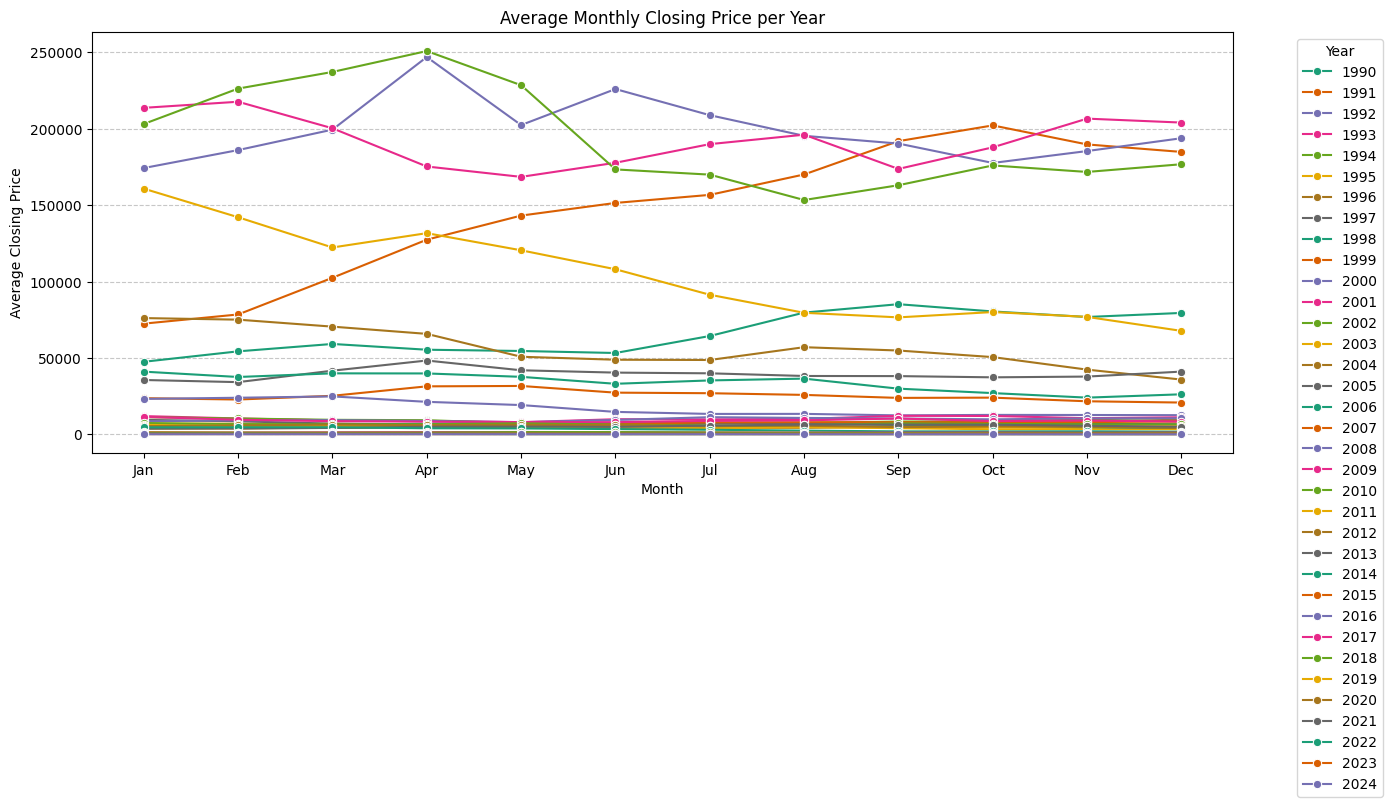

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by Year and Month, and calculate average closing price
monthly_avg = df.groupby(['Year', 'month'])['Close_Price'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg,
             x='month',
             y='Close_Price',
             hue='Year',
             palette='Dark2',
             marker='o')

# Formatting
plt.title('Average Monthly Closing Price per Year')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- The plot shows monthly trends in closing prices from 1990 to 2024.

- Certain early years (especially 1992, 1993, and 2010) stand out with much higher average prices compared to other years.

- For these peak years, prices show seasonal variation — often rising around April to June and slightly declining later, especially visible in 1993 and 2010.

- More recent years (post-2015) seem to stay flat and lower in comparison, suggesting a long-term market shift or decline in this asset's valuation.

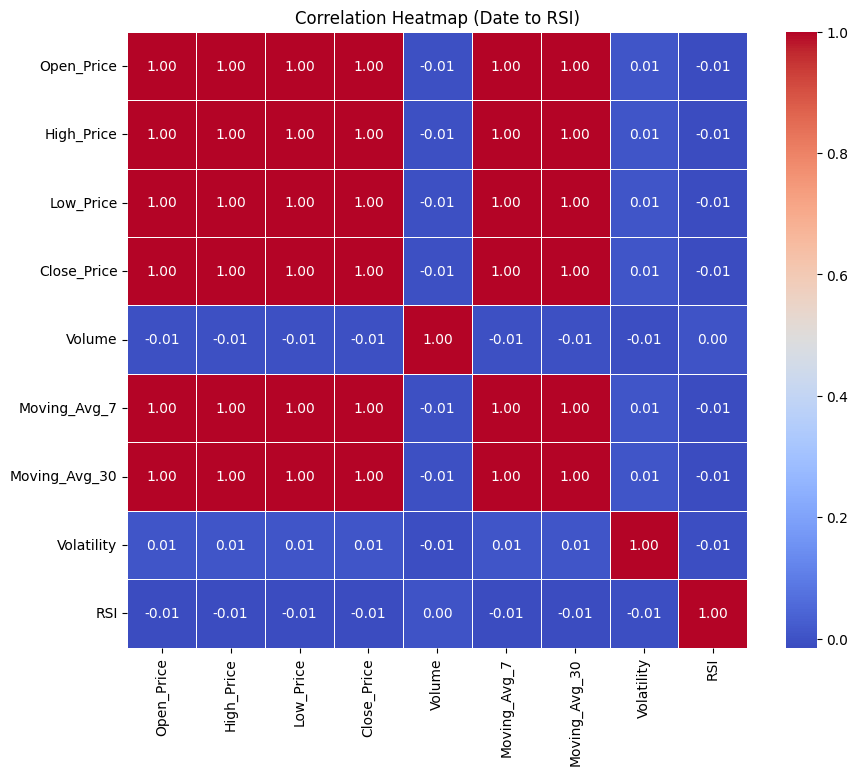

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select columns from Date to RSI
columns_to_include = ['Open_Price', 'High_Price', 'Low_Price', 'Close_Price', 'Volume',
                      'Moving_Avg_7', 'Moving_Avg_30', 'Volatility', 'RSI']

# Create a new DataFrame with only the selected columns
selected_df = df[columns_to_include]

# Compute the correlation matrix
corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Date to RSI)')
plt.show()


In [22]:
corr_matrix

,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI
Open_Price,1.000000,0.999917,0.999909,0.999751,-0.006457,0.999751,0.999751,0.006758,-0.014646
High_Price,0.999917,1.000000,0.999824,0.999756,-0.006604,0.999756,0.999756,0.006608,-0.014735
Low_Price,0.999909,0.999824,1.000000,0.999741,-0.006314,0.999741,0.999741,0.006642,-0.014679
Close_Price,0.999751,0.999756,0.999741,1.000000,-0.006395,1.000000,1.000000,0.006547,-0.014635
Volume,-0.006457,-0.006604,-0.006314,-0.006395,1.000000,-0.006395,-0.006395,-0.010255,0.001575
Moving_Avg_7,0.999751,0.999756,0.999741,1.000000,-0.006395,1.000000,1.000000,0.006547,-0.014635
Moving_Avg_30,0.999751,0.999756,0.999741,1.000000,-0.006395,1.000000,1.000000,0.006547,-0.014635
Volatility,0.006758,0.006608,0.006642,0.006547,-0.010255,0.006547,0.006547,1.000000,-0.010302
RSI,-0.014646,-0.014735,-0.014679,-0.014635,0.001575,-0.014635,-0.014635,-0.010302,1.000000


- Perfectly Correlated Variables: Open Price, High Price, Close Price Moving_Avg_7 and Moving_Avg_30.
- Volume, RSI and Volatility show ~0.00 or ±0.01 correlation with price and with each other. This means that volume does not move predictably with price. Moreoevr, RSI and Volatility show no meaningful relationship.

## Final Conclusion of the EDA
We will be dropping variables and our finaly dataset will only consist of Close_Price, Volume, Moving_Avg_30, Volatility and RSI.

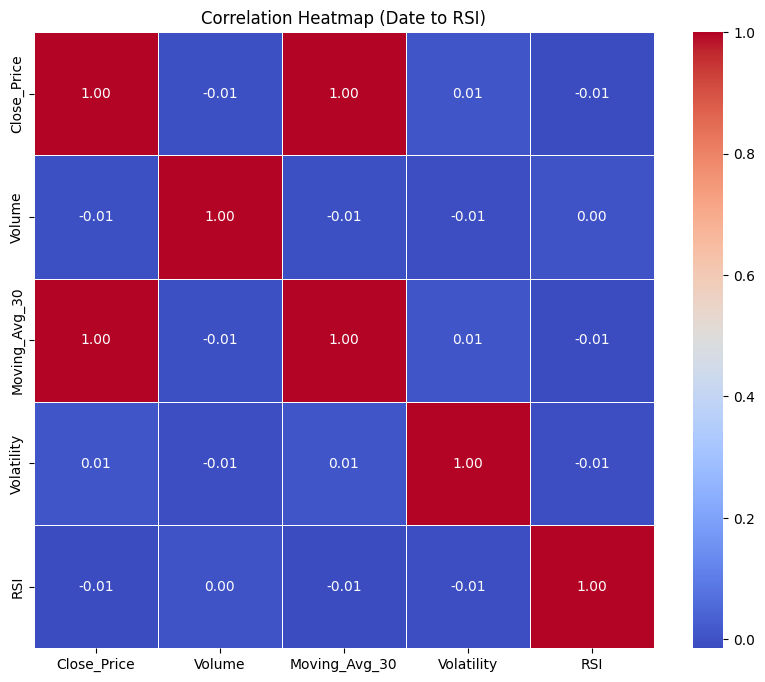

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select columns from Date to RSI
columns_to_include_fin = ['Close_Price', 'Volume',
                      'Moving_Avg_30', 'Volatility', 'RSI']

# Create a new DataFrame with only the selected columns
selected_df = df[columns_to_include_fin]

# Compute the correlation matrix
corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Date to RSI)')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             12784 non-null  datetime64[ns]
 1   Open_Price       12784 non-null  float64       
 2   High_Price       12784 non-null  float64       
 3   Low_Price        12784 non-null  float64       
 4   Close_Price      12784 non-null  float64       
 5   Volume           12784 non-null  int64         
 6   Moving_Avg_7     12784 non-null  float64       
 7   Moving_Avg_30    12784 non-null  float64       
 8   Volatility       12784 non-null  float64       
 9   RSI              12784 non-null  float64       
 10  RSI_Rounded      12784 non-null  int64         
 11  RSI_Label        12784 non-null  object        
 12  Year             12784 non-null  int32         
 13  Two_Year_Period  12784 non-null  int32         
 14  month            12784 non-null  int32

# BOX JENEKINS METHOD

## Step One: Identify characteristics so that we can build an appropriate model

In [25]:
cp_df = df[['Date', 'Close_Price']].copy()
cp_df['Date'] = pd.to_datetime(df['Date'])

In [26]:
cp_df['Date'] = pd.to_datetime(cp_df['Date'])         # Ensure datetime type
cp_df.set_index('Date', inplace=True)                 # Set as index

In [27]:
cp_df.to_csv('date_close_price.csv', index=False)


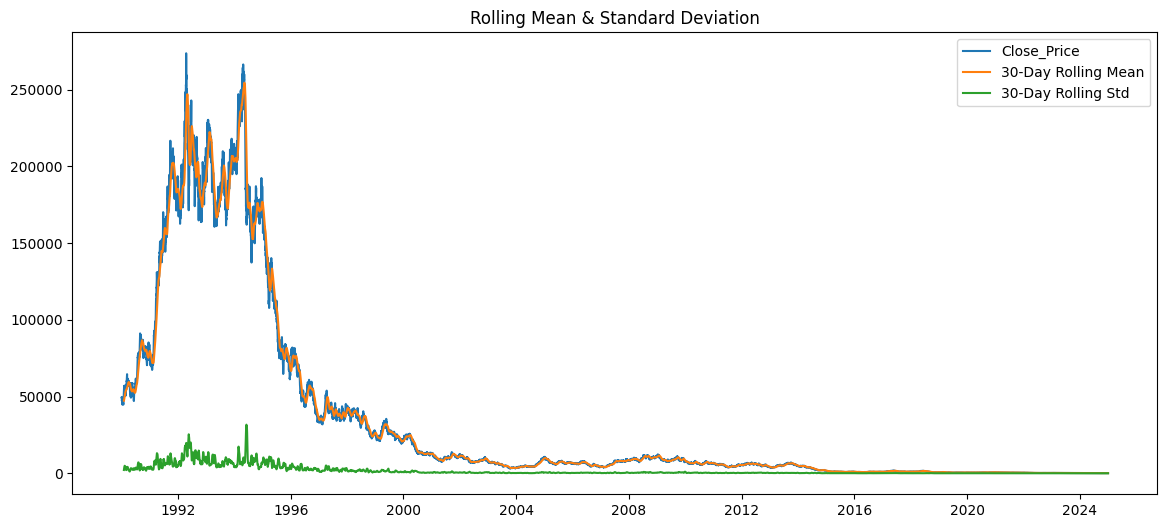

In [142]:
rolling_window = 30
rolling_mean = df['Close_Price'].rolling(window=rolling_window).mean()
rolling_std = df['Close_Price'].rolling(window=rolling_window).std()

plt.figure(figsize=(14,6))
plt.plot(df['Close_Price'], label='Close_Price')
plt.plot(rolling_mean, label=f'{rolling_window}-Day Rolling Mean')
plt.plot(rolling_std, label=f'{rolling_window}-Day Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

### Additive Model
We tried period, 7, 30 and 365 and found that only in 365 was there a seasonality component present.

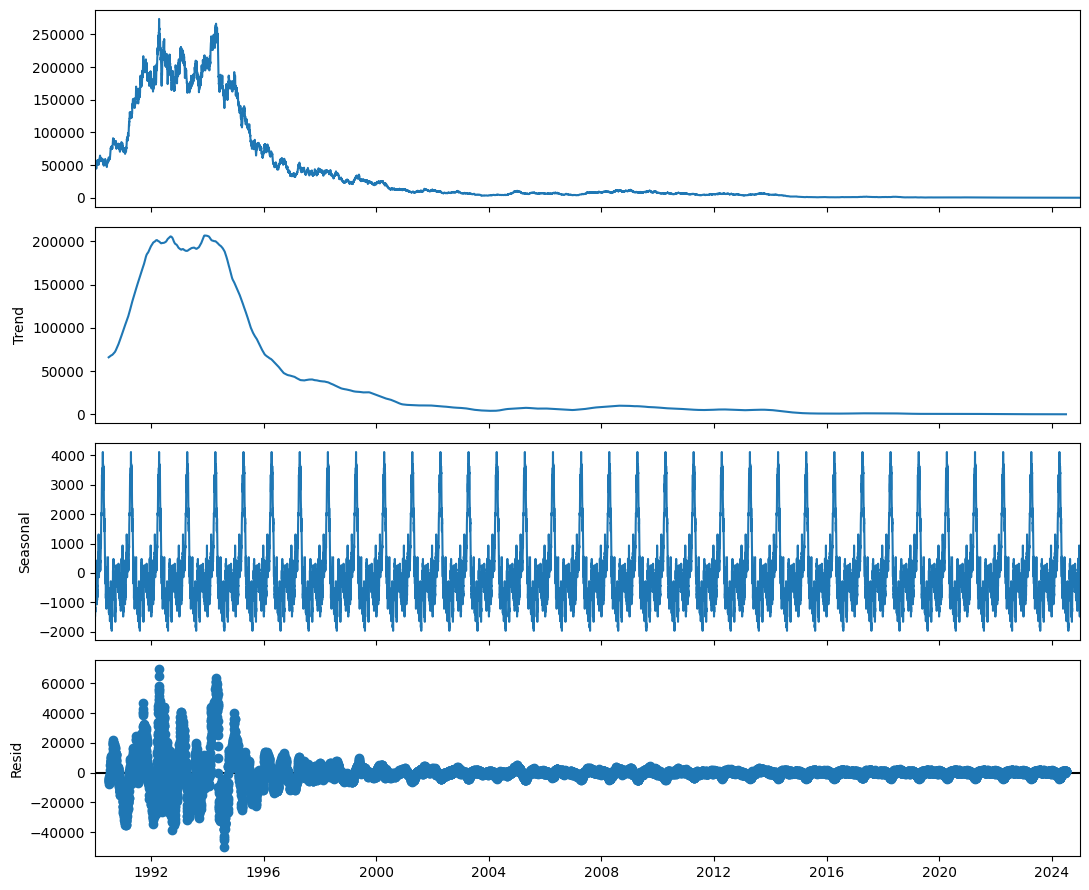

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(cp_df,
                                          model = 'additive',
                                          period=365, # cycle repeats 365 days, i.e., every year
                                         )
fig = decomposition.plot()
plt.show()

### Multiplicative Models
We tried period, 7, 30 and 365 and found that only in 365 was there a seasonality component present.

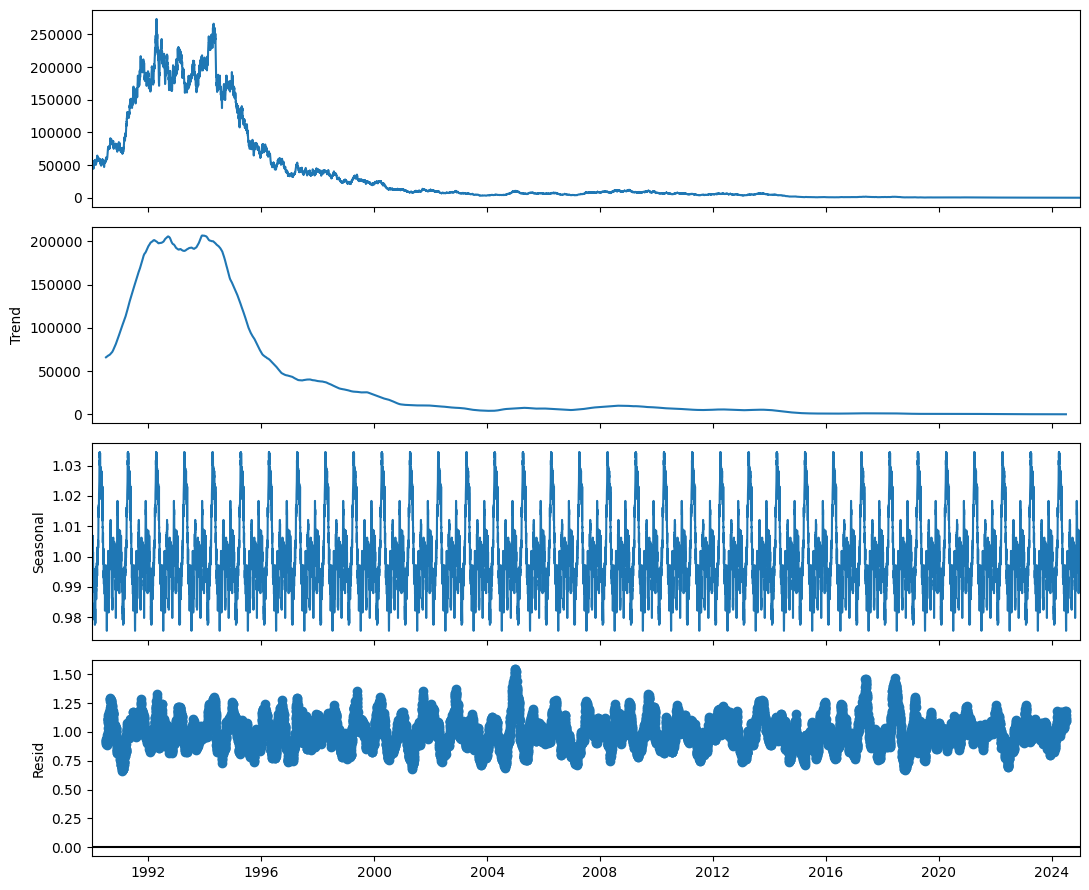

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(cp_df,
                                          model = 'multiplciative',
                                          period=365, # cycle repeats 365 days, i.e., every year
                                         )
fig = decomposition.plot()
plt.show()

### Applying Stationary Tests

In [35]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def obtain_adf_kpss_results(timeseries, max_d):
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series

    Args:
        time_series (df): Dataframe of univariate time series
        max_d (int): Max value of how many times apply difference

    Return:
        Dataframe showing values of ADF statistics and p when applying ADF test after applying d times
        differencing on a time-series.

    """

    results=[]

    for idx in range(max_d):
        adf_result = adfuller(timeseries, autolag='AIC')
        kpss_result = kpss(timeseries, regression='c', nlags="auto")
        timeseries = timeseries.diff().dropna()
        if adf_result[1] <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True

        stationary = adf_stationary & kpss_stationary

        results.append((idx,adf_result[1], kpss_result[1],adf_stationary,kpss_stationary, stationary))

    # Construct DataFrame
    results_df = pd.DataFrame(results, columns=['d','adf_stats','p-value', 'is_adf_stationary','is_kpss_stationary','is_stationary' ])

    return results_df


In [36]:
obtain_adf_kpss_results(cp_df['Close_Price'], 3)

,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,6.158189e-01,0.01,False,False,False
1,1,2.196947e-30,0.10,True,True,True
2,2,0.000000e+00,0.10,True,True,True


That means that the first differenced version of this model is a stationary series. 

### First Differencing

In [37]:
cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()

# Drop the first NA value
diff_series = cp_df['Close_Price_diff1'].dropna()


In [38]:
diff_series.head()

Date
1990-01-02     303.129326
1990-01-03    -700.477298
1990-01-04   -1919.795651
1990-01-05     545.824628
1990-01-06    -579.498534
Name: Close_Price_diff1, dtype: float64

In [39]:
from statsmodels.tsa.stattools import adfuller, kpss

print("ADF on 1st Difference:")
adf_result = adfuller(diff_series)
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

print("\nKPSS on 1st Difference:")
kpss_result = kpss(diff_series, nlags='legacy')
print(f"KPSS Statistic: {kpss_result[0]:.4f}")
print(f"p-value: {kpss_result[1]:.4f}")


ADF on 1st Difference:
ADF Statistic: -18.3955
p-value: 0.0000

KPSS on 1st Difference:
KPSS Statistic: 0.0922
p-value: 0.1000


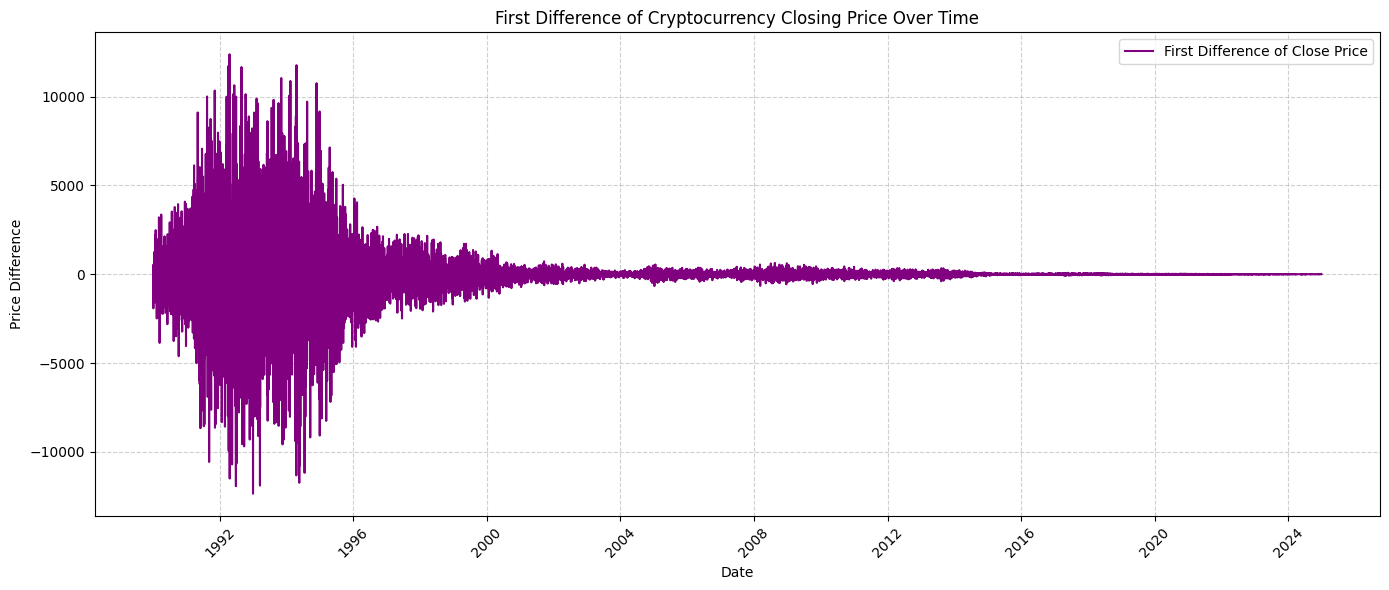

In [40]:
# Plot the first difference using the Date index
plt.figure(figsize=(14, 6))
plt.plot(diff_series.index,    # datetime index
         diff_series.values,   # the diff values
         color='purple',
         label='First Difference of Close Price')

# Labels and formatting
plt.title('First Difference of Cryptocurrency Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

### Plotting ACF and PACF

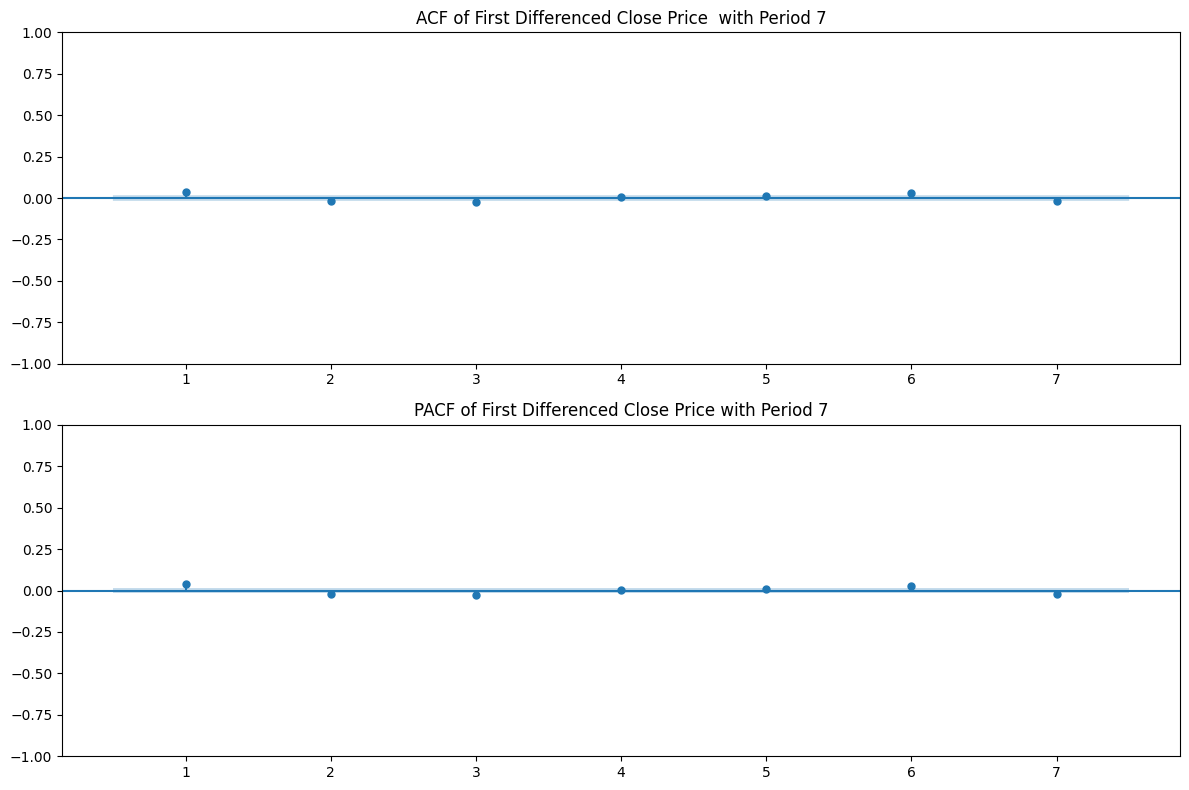

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(diff_series, lags=7, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price  with Period 7')

# Plot PACF
plot_pacf(diff_series, lags=7, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 7')

plt.tight_layout()
plt.show()


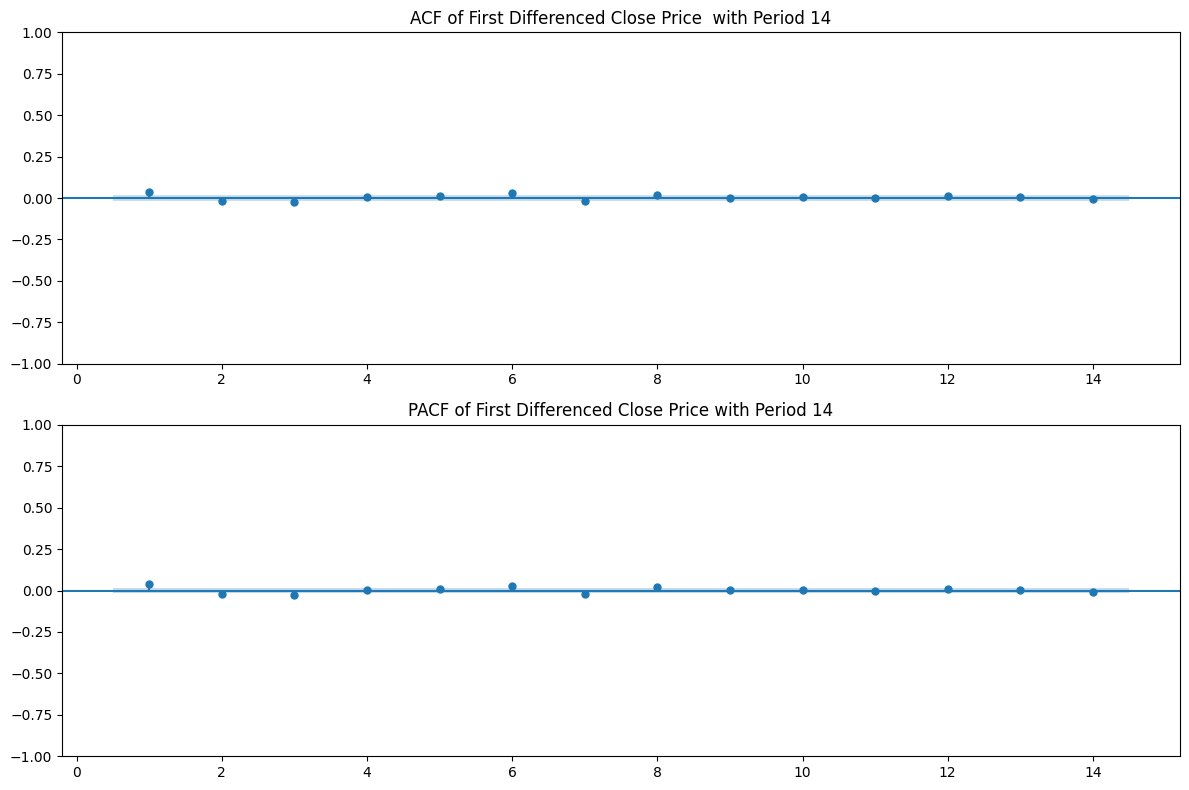

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(diff_series, lags=14, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price  with Period 14')

# Plot PACF
plot_pacf(diff_series, lags=14, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 14')

plt.tight_layout()
plt.show()


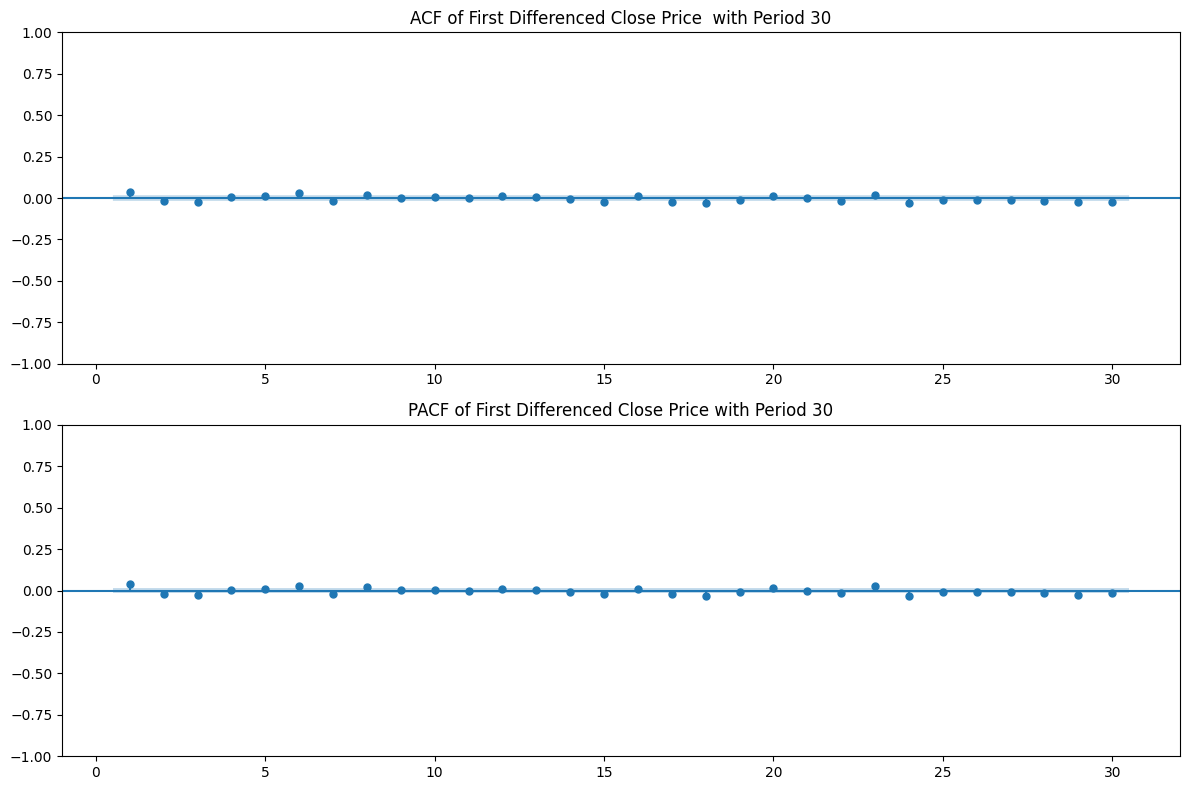

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(diff_series, lags=30, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price  with Period 30')

# Plot PACF
plot_pacf(diff_series, lags=30, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 30')

plt.tight_layout()
plt.show()


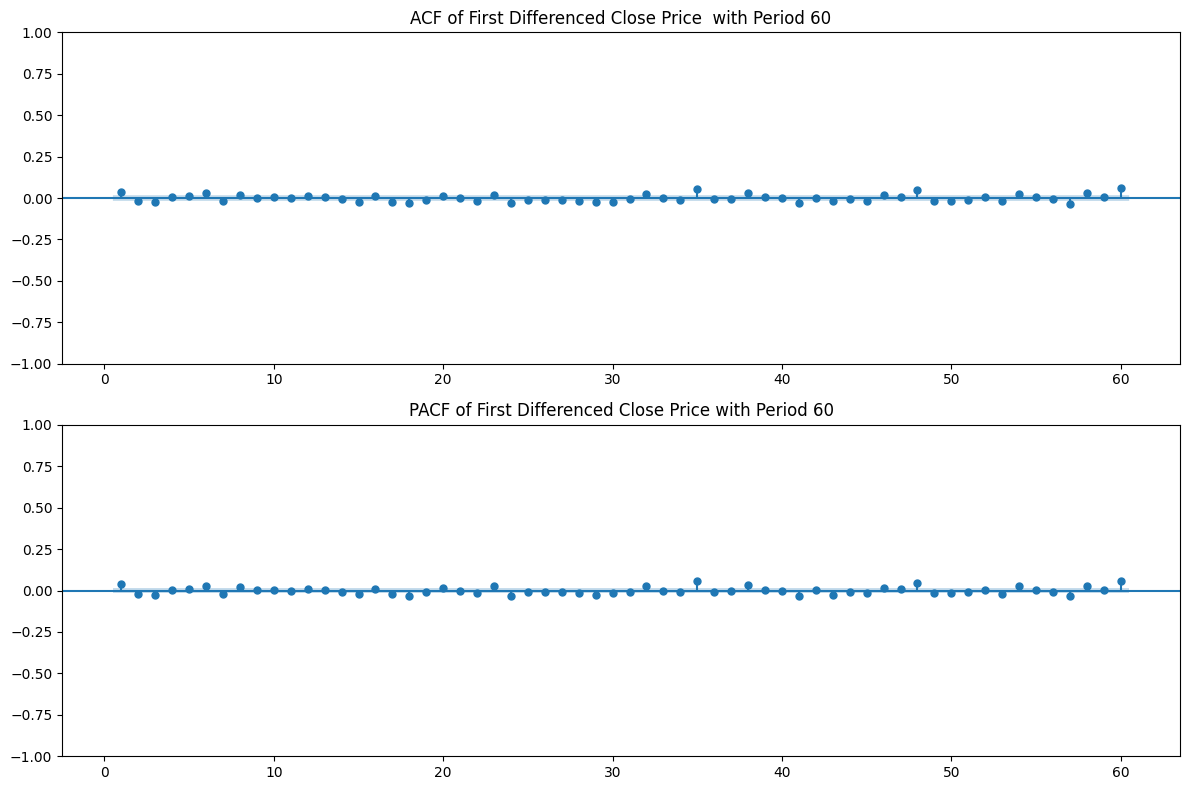

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(diff_series, lags=60, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price  with Period 60')

# Plot PACF
plot_pacf(diff_series, lags=60, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 60')

plt.tight_layout()
plt.show()


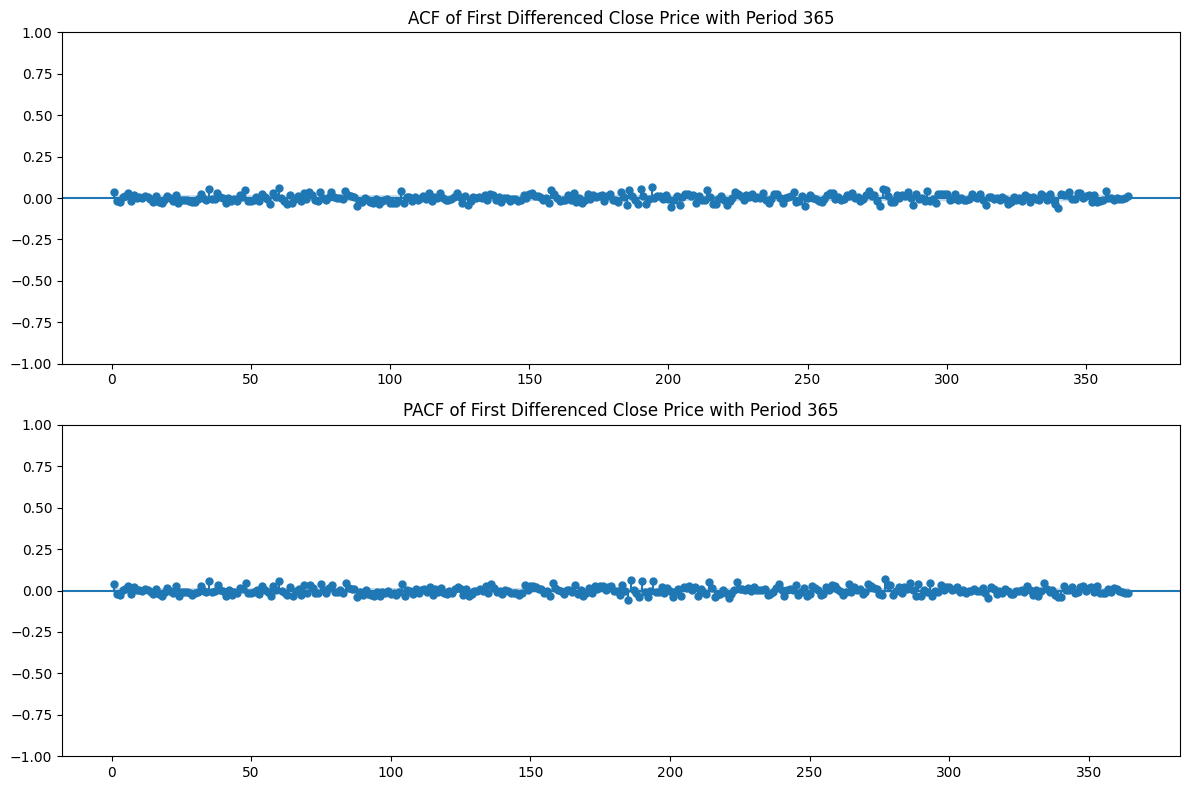

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(diff_series, lags=365, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price with Period 365')

# Plot PACF
plot_pacf(diff_series, lags=364, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 365')

plt.tight_layout()
plt.show()


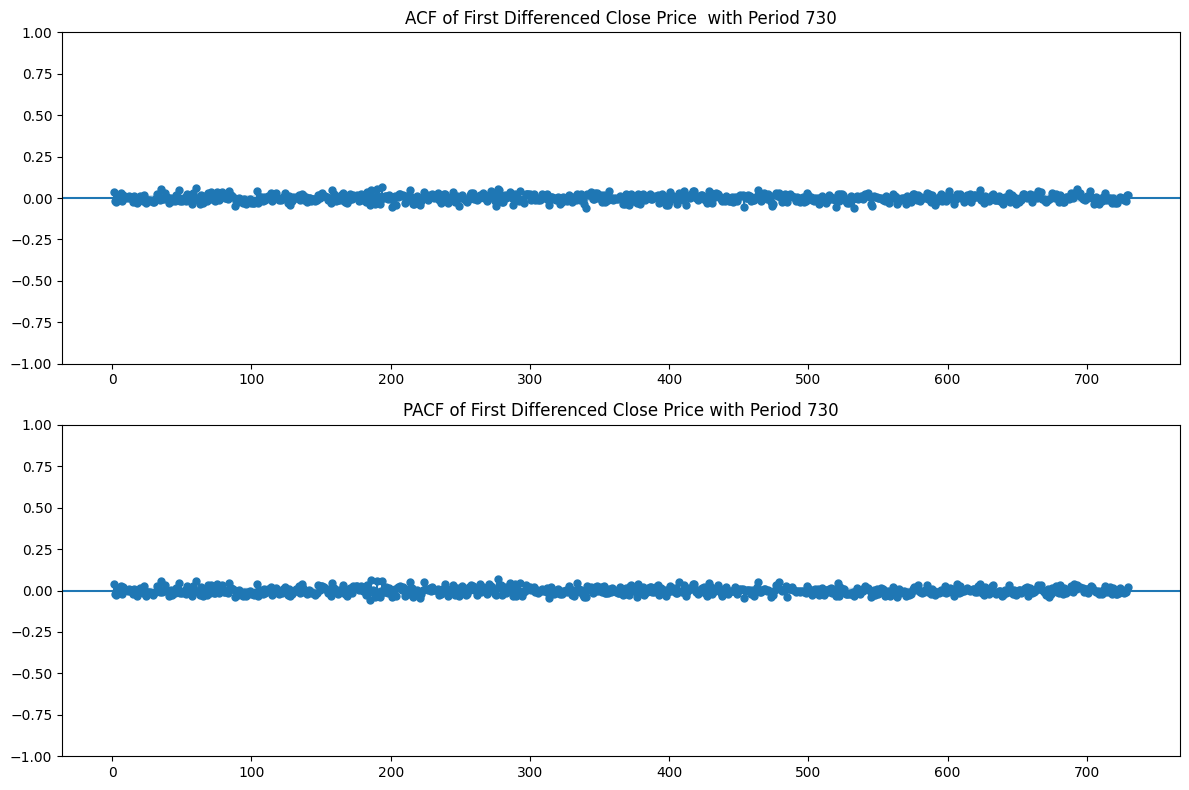

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming this exists already:
#cp_df['Close_Price_diff1'] = cp_df['Close_Price'].diff()
#diff_series = cp_df['Close_Price_diff1'].dropna()

# Create figure with ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(diff_series, lags=730, zero=False, ax=ax1)
ax1.set_title('ACF of First Differenced Close Price  with Period 730')

# Plot PACF
plot_pacf(diff_series, lags=730, zero=False, ax=ax2)
ax2.set_title('PACF of First Differenced Close Price with Period 730')

plt.tight_layout()
plt.show()


🔍 Key Questions to Ask:
To know if this is actually a good sign, ask yourself:
Did you already difference the series?
If yes, it might mean the series is now stationary (good).
If no, and it still looks like this, your series might just be noise or has no autocorrelation.

What’s the goal? Forecasting?
If so, simpler models might work — even just a mean or drift model.
How does the series look visually?
If there's no trend, no seasonality, and it looks like a flat wiggle… you might not need anything fancy.

✅ Summary:
If both ACF and PACF are flat and stay below ±0.25:
→ Your data is probably stationary,
→ Might be best modeled with ARIMA(0, d, 0) or even just a constant mean,
→ You may not need AR or MA components unless more complex dynamics exist.

In [47]:
diff_series.index.freq = 'D'  # You can change 'D' to 'B' for business days, 'M' for monthly, etc.

# Check the frequency and inferred frequency
print(diff_series.index.freq)  # Should print <Day> if it was set correctly
print(diff_series.index.inferred_freq)  # Should print <Day> or similar if inferred correctly


<Day>
D


### Creating the new dataset with differenced values for model

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             12784 non-null  datetime64[ns]
 1   Open_Price       12784 non-null  float64       
 2   High_Price       12784 non-null  float64       
 3   Low_Price        12784 non-null  float64       
 4   Close_Price      12784 non-null  float64       
 5   Volume           12784 non-null  int64         
 6   Moving_Avg_7     12784 non-null  float64       
 7   Moving_Avg_30    12784 non-null  float64       
 8   Volatility       12784 non-null  float64       
 9   RSI              12784 non-null  float64       
 10  RSI_Rounded      12784 non-null  int64         
 11  RSI_Label        12784 non-null  object        
 12  Year             12784 non-null  int32         
 13  Two_Year_Period  12784 non-null  int32         
 14  month            12784 non-null  int32

In [49]:
df_1 = df.drop(['RSI_Rounded', 'Year', 'RSI_Label', 'Two_Year_Period', 'month', 'day', 'weekday', 'year_month'], axis=1)


In [50]:
diff_series.head()

Date
1990-01-02     303.129326
1990-01-03    -700.477298
1990-01-04   -1919.795651
1990-01-05     545.824628
1990-01-06    -579.498534
Freq: D, Name: Close_Price_diff1, dtype: float64

In [51]:
df_1['Close_Price_diff'] = df_1['Close_Price'].diff()

In [52]:
df_1.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,weekday_name,month_name,Close_Price_diff
0,1990-01-01,50381.597367,52295.056945,48754.706054,49450.823866,2476,49450.823866,49450.823866,0.025218,54.235666,Mon,January,NaN
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,Tue,January,303.129326
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,Wed,January,-700.477298
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,Thu,January,-1919.795651
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,Fri,January,545.824628


In [53]:
final_df = df_1.drop(0)


In [54]:
final_df.head()

,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,weekday_name,month_name,Close_Price_diff
1,1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,Tue,January,303.129326
2,1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,Wed,January,-700.477298
3,1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,Thu,January,-1919.795651
4,1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,Fri,January,545.824628
5,1990-01-06,47038.899406,48328.326956,45984.969970,47100.006337,2961,47100.006337,47100.006337,0.059547,30.119253,Sat,January,-579.498534


In [55]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.set_index('Date', inplace=True)

In [56]:
final_df.head()

,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,weekday_name,month_name,Close_Price_diff
Date,,,,,,,,,,,,
1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,Tue,January,303.129326
1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,Wed,January,-700.477298
1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,Thu,January,-1919.795651
1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,Fri,January,545.824628
1990-01-06,47038.899406,48328.326956,45984.969970,47100.006337,2961,47100.006337,47100.006337,0.059547,30.119253,Sat,January,-579.498534


## Step Two: Estimating coefficients p and q

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order_aic_bic = []

for p in range(7):
    for q in range(7):
        try:
            model = SARIMAX(diff_series, order=(p, 1, q))
            results = model.fit(disp=False)
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            continue


In [58]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p','q','AIC','BIC'])

In [59]:
# Print order_df in order of increasing AIC
order_df.sort_values('AIC')

,p,q,AIC,BIC
40,5,5,223910.978302,223992.992027
33,4,5,223917.581613,223992.139546
20,2,6,223922.069274,223989.171413
47,6,5,223927.485104,224016.954622
34,4,6,223934.706994,224016.720719
27,3,6,223937.803317,224012.361249
19,2,5,223938.518849,223998.165195
43,6,1,223941.519315,224001.165660
18,2,4,223946.662369,223998.852921
22,3,1,223947.209495,223984.488461


In [60]:
# Print order_df in order of increasing BIC
order_df.sort_values('BIC')

,p,q,AIC,BIC
2,0,2,223955.093234,223977.460613
8,1,1,223955.744727,223978.112107
15,2,1,223953.262206,223983.085378
3,0,3,223954.173367,223983.996540
22,3,1,223947.209495,223984.488461
4,0,4,223947.638256,223984.917222
1,0,1,223973.176874,223988.088460
20,2,6,223922.069274,223989.171413
11,1,4,223947.232568,223991.967327
33,4,5,223917.581613,223992.139546


According to AIC ARIMA(5, 1, 5) would be the best model. On the other hand, according to BIC ARIMA(0, 1, 2) would be the best model. And based on our own observation of the ACF and PCF webeleived that ARIMA(0, 1, 0) would have been the best model, which interestign enough is considered the worst by both AIC and BIC measures.

## STEP 3: Model Evaluation 

### ARIMA(5, 1, 5)

Before, using a model we want to know how accurate it is. Here we present some tools to evaluate the model before considering it the best one and putting it to production.

For this evaluation we focus on the residuals. The residuals are the difference between the model's one-step-ahead predictions and the real values of the time series.

Mean Absolute Error (MAE)

We start by calculating the `Mean Absolute Error (MAE)` of the residuals. This will show us how far, on average, the predictions are from the true values.

In [61]:
arimaA_model = SARIMAX(diff_series, order=(5,1,5))
# fit model
arimaA_results = arimaA_model.fit()

# Calculate the mean absolute error from residuals
mae_A = np.mean(np.abs(arimaA_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_A)

MAE: 617.181


In [62]:
diff_series.describe()

count    12783.000000
mean        -3.858787
std       1543.514845
min     -12357.046780
25%        -93.312151
50%         -0.230933
75%         92.847373
max      12377.107511
Name: Close_Price_diff1, dtype: float64

In [63]:
arimaA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Close_Price_diff1   No. Observations:                12783
Model:               SARIMAX(5, 1, 5)   Log Likelihood             -111944.489
Date:                Sun, 20 Apr 2025   AIC                         223910.978
Time:                        02:02:02   BIC                         223992.992
Sample:                    01-02-1990   HQIC                        223938.404
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8621      0.005   -356.738      0.000      -1.872      -1.852
ar.L2         -2.3106      0.010   -235.362      0.000      -2.330      -2.291
ar.L3         -1.7754      0.011   -164.505      0.000      -1.797      -1.754
ar.L4         -0.9154      0.007   -124.101      0.000      -0.930      -0.901
ar.L5          0.0227      0.004      6.160      0.000       0.016       0.030
ma.L1          0.9043      0.006    147.575      0.000       0.892       0.916
ma.L2          0.4808      0.010     48.537      0.000       0.461       0.500
ma.L3         -0.5230      0.011    -47.120      0.000      -0.545      -0.501
ma.L4         -0.8933      0.010    -92.820      0.000      -0.912      -0.874
ma.L5         -0.9686      0.006   -161.358      0.000      -0.980      -0.957
sigma2      2.525e+06   2.51e-08   1.01e+14      0.000    2.52e+06    2.52e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            134901.92
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.7e+27. Standard errors may be unstable.
"""

Prob(Q) = 0.77 > 0.05.  We shouldn't reject the null hypothesis that the residuals are uncorrelated so the `residuals are not correlated`.

Prob(JB) = 0.00 < 0.05. We reject the null hypothesis that the residuals are normally distributed. Therefore, the residuals are `not normally distributed`.

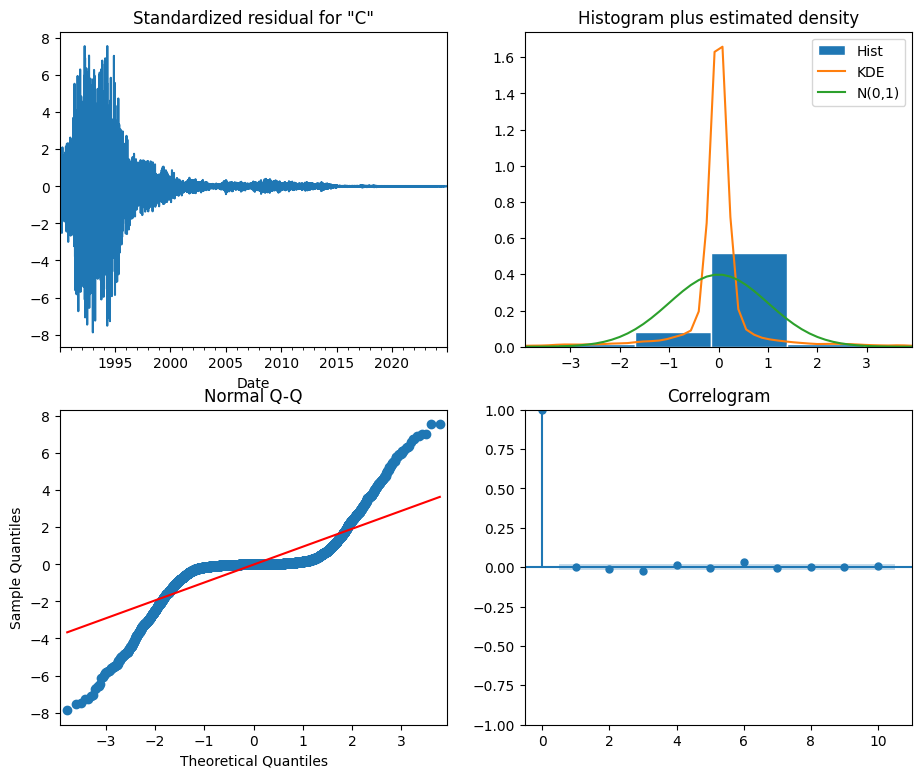

In [64]:
arimaA_results.plot_diagnostics()
plt.show()

### ARIMA(0, 1, 2)

In [65]:
arimaB_model = SARIMAX(diff_series, order=(0,1,2))
# fit model
arimaB_results = arimaB_model.fit()

# Calculate the mean absolute error from residuals
mae_B = np.mean(np.abs(arimaB_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_B)

MAE: 618.243


In [66]:
diff_series.describe()

count    12783.000000
mean        -3.858787
std       1543.514845
min     -12357.046780
25%        -93.312151
50%         -0.230933
75%         92.847373
max      12377.107511
Name: Close_Price_diff1, dtype: float64

In [67]:
arimaB_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Close_Price_diff1   No. Observations:                12783
Model:               SARIMAX(0, 1, 2)   Log Likelihood             -111974.547
Date:                Sun, 20 Apr 2025   AIC                         223955.093
Time:                        02:02:03   BIC                         223977.461
Sample:                    01-02-1990   HQIC                        223962.573
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9600      0.006   -158.107      0.000      -0.972      -0.948
ma.L2         -0.0400      0.003    -12.387      0.000      -0.046      -0.034
sigma2      2.379e+06   1.56e+04    152.761      0.000    2.35e+06    2.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            136086.61
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

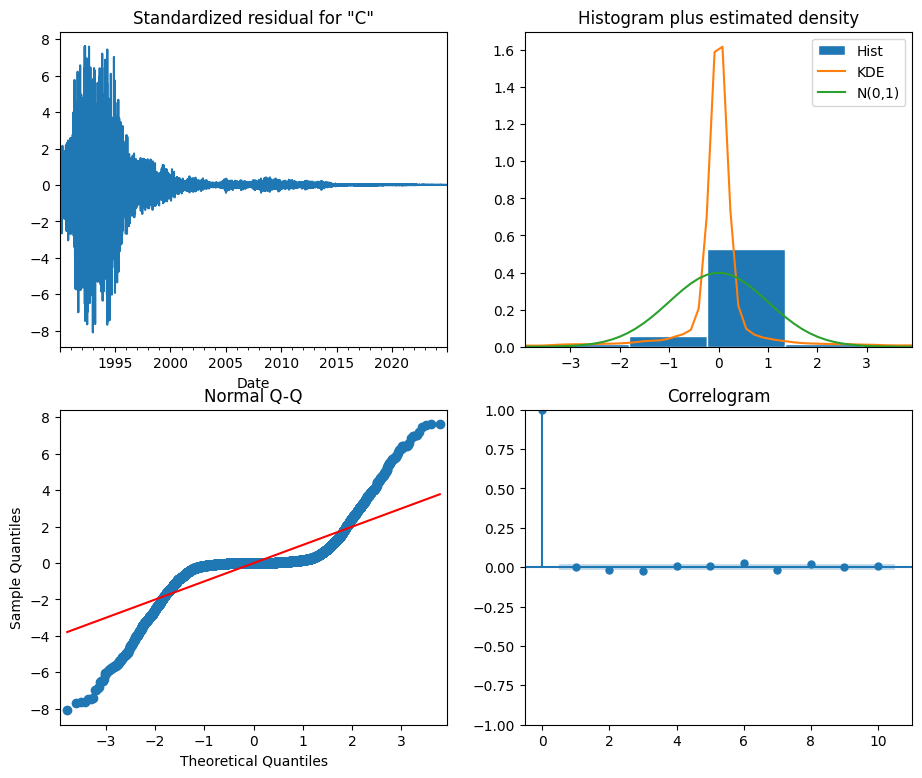

In [68]:
arimaB_results.plot_diagnostics()
plt.show()

### ARIMA(0, 1, 0)

In [69]:
#diff_2 = diff_series.diff().dropna()

arimaO_model = SARIMAX(diff_series, order=(0,1,0))
# fit model
arimaO_results = arimaO_model.fit()

# Calculate the mean absolute error from residuals
mae_O = np.mean(np.abs(arimaO_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_O)

MAE: 858.524


In [70]:
diff_series.describe()

count    12783.000000
mean        -3.858787
std       1543.514845
min     -12357.046780
25%        -93.312151
50%         -0.230933
75%         92.847373
max      12377.107511
Name: Close_Price_diff1, dtype: float64

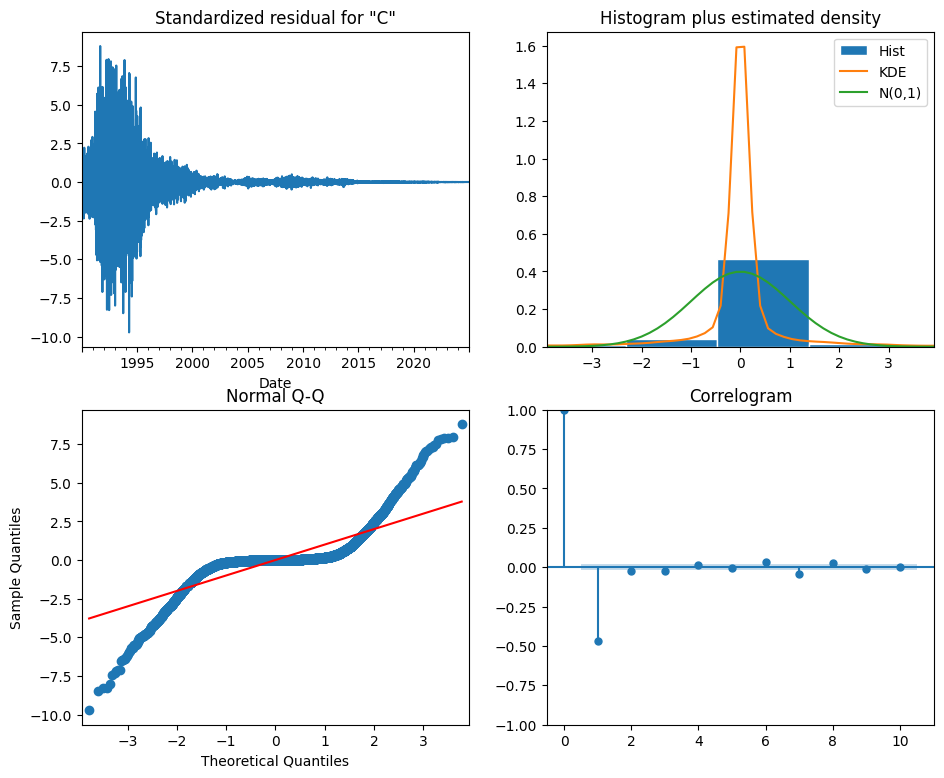

In [71]:
arimaO_results.plot_diagnostics()
plt.show()

### SARIMA MODEL

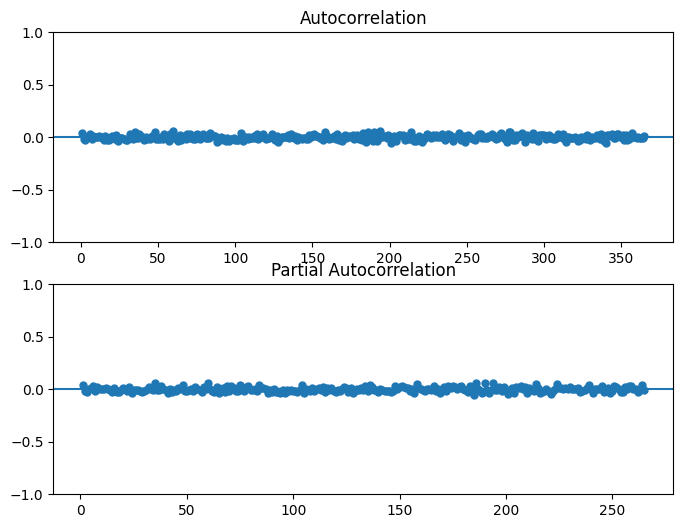

In [72]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(diff_series, lags=365, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(diff_series, lags=265, zero=False, ax=ax2)

plt.show()

In [73]:
diff_seasonal_series = diff_series.diff(periods=365).dropna()


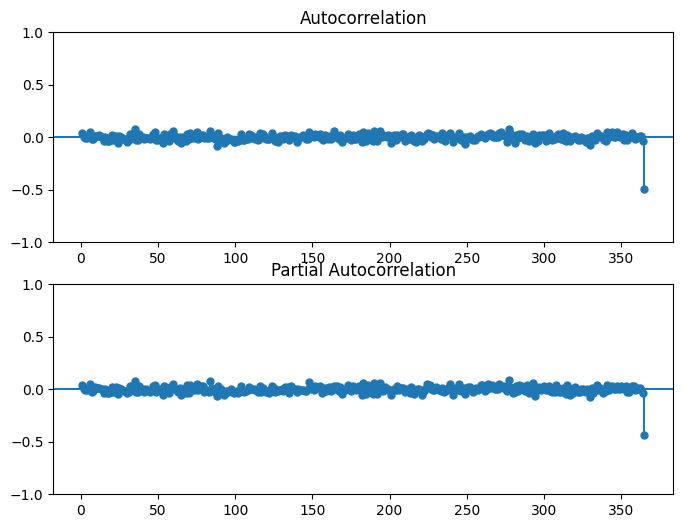

In [74]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(diff_seasonal_series, lags=365, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(diff_seasonal_series, lags=365, zero=False, ax=ax2)

plt.show()

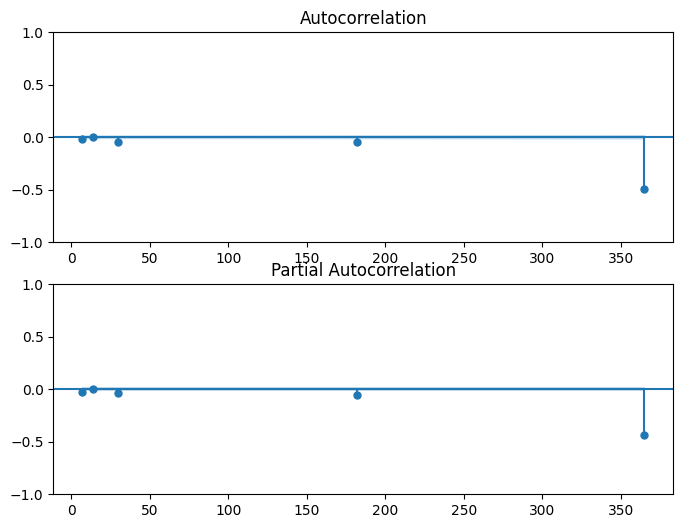

In [75]:
# Make list of lags
lags = [7, 14, 30, 182, 365]

# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(diff_seasonal_series, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(diff_seasonal_series, lags=lags, zero=False, ax=ax2)

plt.show()

In [76]:

sarima_01_model = SARIMAX(diff_seasonal_series, order=(0, 1, 0), seasonal_order=(1, 1, 1, 365))
sarima_01_results = sarima_01_model.fit()

# Calculate the mean absolute error from residuals
mae_S01 = np.mean(np.abs(sarima_01_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_S01)


KeyboardInterrupt: 

In [ ]:
sarima_01_results.summary()

In [ ]:
sarima_01_results.plot_diagnostics()
plt.show()

In the end, had to choose not ot run this. Ran this code for more than an hour and did not run. Chose to elimnate this model.

### SARIMAX MODEL (0, 1, 0)(1, 1, 1, 365)

In [79]:
final_df.head()

,Open_Price,High_Price,Low_Price,Close_Price,Volume,Moving_Avg_7,Moving_Avg_30,Volatility,RSI,weekday_name,month_name,Close_Price_diff
Date,,,,,,,,,,,,
1990-01-02,49406.824884,51105.446544,48256.739542,49753.953192,1778,49753.953192,49753.953192,0.064403,43.682185,Tue,January,303.129326
1990-01-03,49584.138601,52017.231849,47190.477908,49053.475894,4515,49053.475894,49053.475894,0.054559,65.493205,Wed,January,-700.477298
1990-01-04,48083.511999,50282.266911,46404.496989,47133.680242,2180,47133.680242,47133.680242,0.082038,67.813627,Thu,January,-1919.795651
1990-01-05,47247.201554,49540.890965,46097.467055,47679.504870,1798,47679.504870,47679.504870,0.092261,45.025906,Fri,January,545.824628
1990-01-06,47038.899406,48328.326956,45984.969970,47100.006337,2961,47100.006337,47100.006337,0.059547,30.119253,Sat,January,-579.498534


In [81]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index -- done already
#final_df['Date'] = pd.to_datetime(final_df['Date'])
#final_df.set_index('Date', inplace=True)

# Define the target and exogenous variables
y = final_df['Close_Price_diff']
exog = final_df[['Volume', 'Moving_Avg_30', 'Volatility', 'RSI']]


In [ ]:
model_SX = SARIMAX(y,
                exog=exog,
                order=(0, 1, 0),  # You can adjust this based on model tuning (AIC/BIC)
                seasonal_order=(1, 1, 1, 365),  # Seasonal components if applicable
                enforce_stationarity=False,
                enforce_invertibility=False)

results_SX = model_SX.fit()


In [83]:
results_SX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Close_Price_diff1   No. Observations:                12783
Model:               SARIMAX(6, 1, 6)   Log Likelihood             -111968.622
Date:                Sun, 20 Apr 2025   AIC                         223963.245
Time:                        03:34:40   BIC                         224060.170
Sample:                    01-02-1990   HQIC                        223995.657
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6450      0.048    -34.209      0.000      -1.739      -1.551
ar.L2         -2.3914      0.082    -29.300      0.000      -2.551      -2.231
ar.L3         -2.2244      0.099    -22.478      0.000      -2.418      -2.030
ar.L4         -1.3382      0.072    -18.660      0.000      -1.479      -1.198
ar.L5         -0.7572      0.035    -21.651      0.000      -0.826      -0.689
ar.L6          0.0294      0.005      5.905      0.000       0.020       0.039
ma.L1          0.6964      0.048     14.568      0.000       0.603       0.790
ma.L2          0.7662      0.048     15.847      0.000       0.671       0.861
ma.L3         -0.1495      0.035     -4.314      0.000      -0.217      -0.082
ma.L4         -0.8947      0.041    -21.780      0.000      -0.975      -0.814
ma.L5         -0.6236      0.050    -12.586      0.000      -0.721      -0.526
ma.L6         -0.7928      0.040    -20.045      0.000      -0.870      -0.715
sigma2      2.513e+06   8.03e-08   3.13e+13      0.000    2.51e+06    2.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):            135783.95
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+30. Standard errors may be unstable.
"""

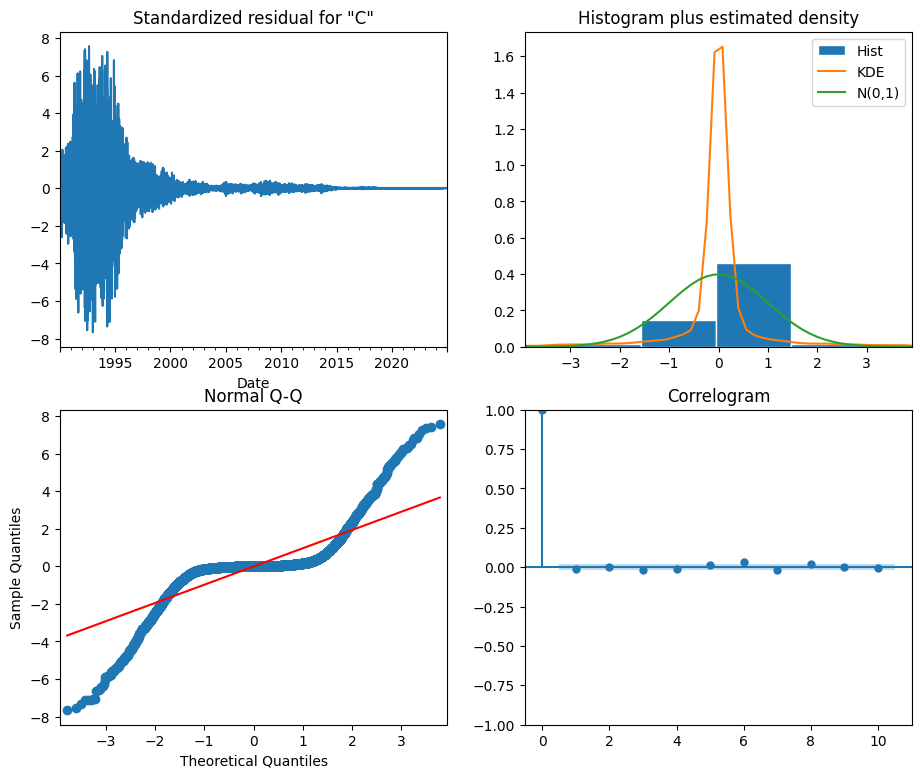

In [84]:
results_SX.plot_diagnostics()
plt.show()

### ARIMAX(0, 1, 0)

In [120]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure datetime index -- done already
#final_df['Date'] = pd.to_datetime(final_df['Date'])
#final_df.set_index('Date', inplace=True)

# Define the target and exogenous variables
y = final_df['Close_Price_diff']
exog = final_df[['Volume', 'Moving_Avg_30', 'Volatility', 'RSI']]


In [116]:
model_AX = SARIMAX(y,
                exog=exog,
                order=(0, 1, 0),  # You can adjust this based on model tuning (AIC/BIC)
               # seasonal_order=(1, 1, 1, 0),  # Seasonal components if applicable
                enforce_stationarity=False,
                enforce_invertibility=False)

results_AX = model.fit()


In [119]:
# Calculate the mean absolute error from residuals
mae_AX = np.mean(np.abs(results_AX.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_AX)

MAE: 618.050


In [117]:
results_AX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Close_Price_diff1   No. Observations:                12783
Model:               SARIMAX(6, 1, 6)   Log Likelihood             -111968.622
Date:                Sun, 20 Apr 2025   AIC                         223963.245
Time:                        10:22:13   BIC                         224060.170
Sample:                    01-02-1990   HQIC                        223995.657
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6450      0.048    -34.209      0.000      -1.739      -1.551
ar.L2         -2.3914      0.082    -29.300      0.000      -2.551      -2.231
ar.L3         -2.2244      0.099    -22.478      0.000      -2.418      -2.030
ar.L4         -1.3382      0.072    -18.660      0.000      -1.479      -1.198
ar.L5         -0.7572      0.035    -21.651      0.000      -0.826      -0.689
ar.L6          0.0294      0.005      5.905      0.000       0.020       0.039
ma.L1          0.6964      0.048     14.568      0.000       0.603       0.790
ma.L2          0.7662      0.048     15.847      0.000       0.671       0.861
ma.L3         -0.1495      0.035     -4.314      0.000      -0.217      -0.082
ma.L4         -0.8947      0.041    -21.780      0.000      -0.975      -0.814
ma.L5         -0.6236      0.050    -12.586      0.000      -0.721      -0.526
ma.L6         -0.7928      0.040    -20.045      0.000      -0.870      -0.715
sigma2      2.513e+06   8.03e-08   3.13e+13      0.000    2.51e+06    2.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):            135783.95
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+30. Standard errors may be unstable.
"""

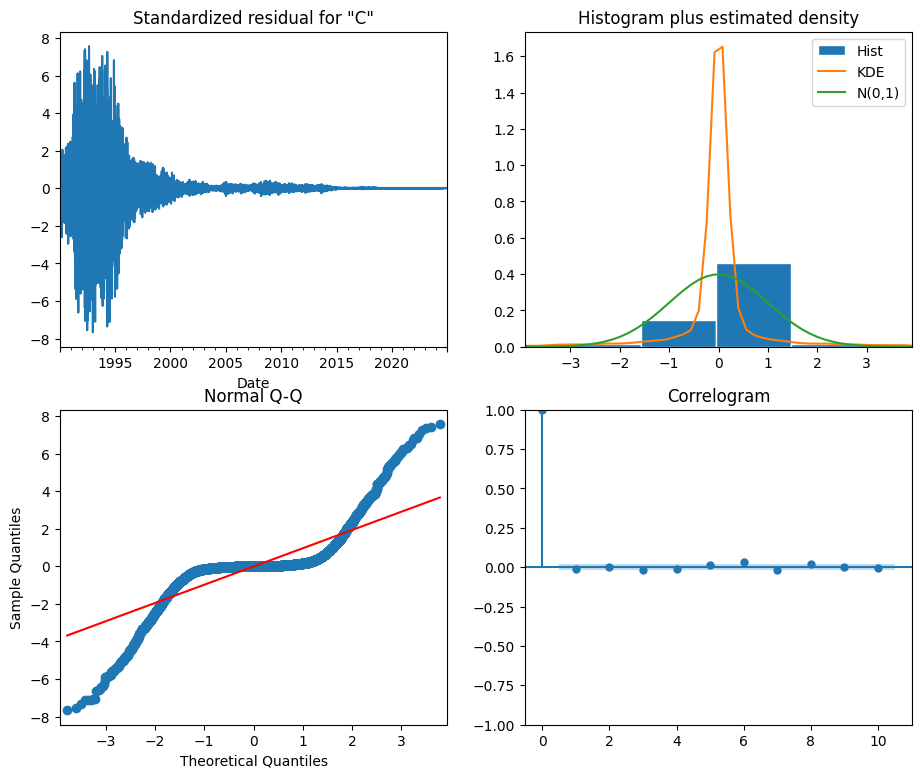

In [118]:
results_AX.plot_diagnostics()
plt.show()

### AUTOMATED MODEL SELECTION

In [87]:
pip install numpy Cython setuptools wheel


  Using cached Cython-3.0.12-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached Cython-3.0.12-py2.py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install pmdarima --no-build-isolation


  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Preparing metadata (pyproject.toml) ... done
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl (11.1 MB)
Using cached urllib3-2.4.0-py3-none-any.whl (128 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Created wheel for pmdarima: filename=pmdarima-2.0.4-cp313-cp313-macosx_11_0_arm64.whl size=610437 sha256=4113fa5f73722c6635bb55a2d14d180564909762bb33683fe11d3739f01c7706
  Stored in directory: /Users/ayesharao/Library/Caches/pip/wheels/db/06/9f/423e5630ceb87f075fceb7d5eb52f71c120ae52398be8e8b5c
Successfully built pmdarima
Note: you may need to restart the kernel to use updated packa

In [121]:
import pmdarima as pm

# Create auto_arima model for non-seasonal data
model1 = pm.auto_arima(y,  # your time series
                      exogenous=exog,  # include this only if you're using exogenous variables
                      seasonal=False,  # turn OFF seasonality
                      d=1,  # order of differencing (can be None if you want it to auto-determine)
                      max_p=7, 
                      max_q=7,
                      information_criterion='aic',
                      trace=True,
                      error_action='ignore',
                      stepwise=True,
                      suppress_warnings=True)

# Print model summary
print(model1.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=232320.283, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=229117.474, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=232318.283, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=227773.589, Time=0.41 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=226852.415, Time=0.38 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=226276.226, Time=0.62 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=225804.885, Time=0.68 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=225623.598, Time=0.93 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=225367.852, Time=1.85 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.41 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.59 sec
 ARIMA(7,1,0)(0,0,0)[0]             : AIC=225365.852, Time=1.01 sec
 ARIMA(6,1,0)(0,0,0)[0]         

In [122]:
arimax_02 = SARIMAX(y,
                exog=exog,
                order=(7, 1, 0),  # You can adjust this based on model tuning (AIC/BIC)
               # seasonal_order=(1, 1, 1, 0),  # Seasonal components if applicable
                enforce_stationarity=False,
                enforce_invertibility=False)

arimax_02_results = model.fit()

# Calculate the mean absolute error from residuals
mae_ax02 = np.mean(np.abs(arimax_02_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae_ax02)

MAE: 618.050


In [123]:
arimax_02_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Close_Price_diff1   No. Observations:                12783
Model:               SARIMAX(6, 1, 6)   Log Likelihood             -111968.622
Date:                Sun, 20 Apr 2025   AIC                         223963.245
Time:                        10:53:09   BIC                         224060.170
Sample:                    01-02-1990   HQIC                        223995.657
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6450      0.048    -34.209      0.000      -1.739      -1.551
ar.L2         -2.3914      0.082    -29.300      0.000      -2.551      -2.231
ar.L3         -2.2244      0.099    -22.478      0.000      -2.418      -2.030
ar.L4         -1.3382      0.072    -18.660      0.000      -1.479      -1.198
ar.L5         -0.7572      0.035    -21.651      0.000      -0.826      -0.689
ar.L6          0.0294      0.005      5.905      0.000       0.020       0.039
ma.L1          0.6964      0.048     14.568      0.000       0.603       0.790
ma.L2          0.7662      0.048     15.847      0.000       0.671       0.861
ma.L3         -0.1495      0.035     -4.314      0.000      -0.217      -0.082
ma.L4         -0.8947      0.041    -21.780      0.000      -0.975      -0.814
ma.L5         -0.6236      0.050    -12.586      0.000      -0.721      -0.526
ma.L6         -0.7928      0.040    -20.045      0.000      -0.870      -0.715
sigma2      2.513e+06   8.03e-08   3.13e+13      0.000    2.51e+06    2.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):            135783.95
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.64e+30. Standard errors may be unstable.
"""

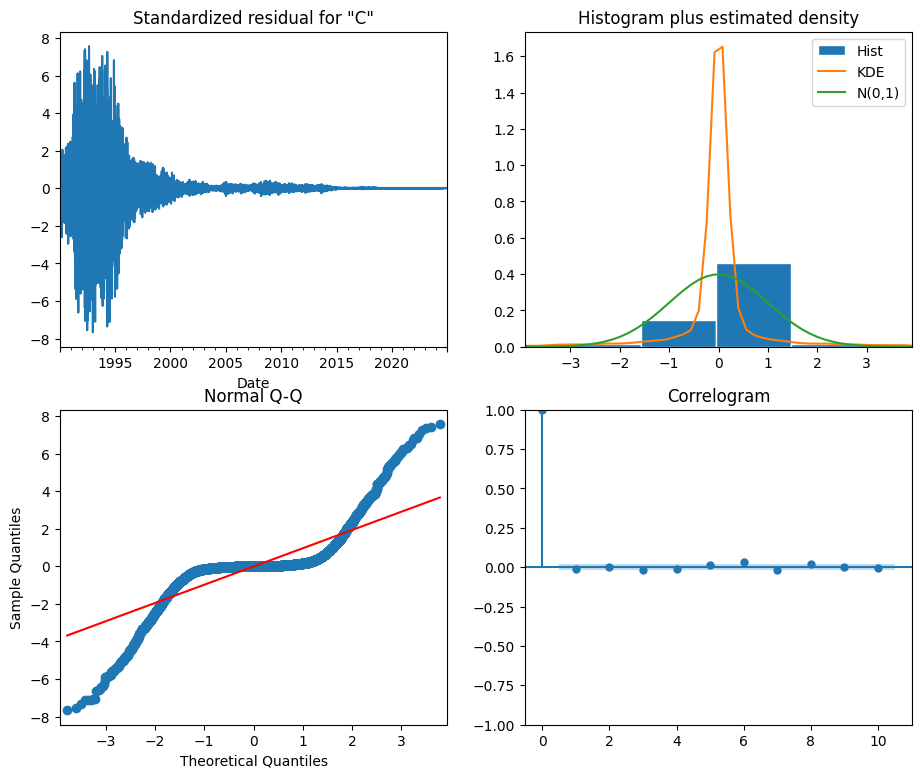

In [124]:
# Create the 4 diagostics plots
arimax_02_results.plot_diagnostics()
plt.show()

## Step 4: Forecasting Comparision

In [125]:
# Create ARIMA mean forecast
arimaA_pred = arimaA_results.get_prediction(start=-90, dynamic=True)
arimaA_mean = arimaA_pred.predicted_mean

# Create ARIMA mean forecast
arimaB_pred = arimaB_results.get_prediction(start=-90, dynamic=True)
arimaB_mean = arimaB_pred.predicted_mean

# Create ARIMA mean forecast
arimaO_pred = arimaO_results.get_prediction(start=-90, dynamic=True)
arimaO_mean = arimaO_pred.predicted_mean

# Create SARIMA mean forecast
sarima_sx_pred = results_SX.get_prediction(start=-90, dynamic=True)
sarima_sx_mean = sarima_sx_pred.predicted_mean

# Create ARIMAX mean forecast
arimax_01_pred = results_AX.get_prediction(start=-90, dynamic=True)
arimax_01_mean = arimax_01_pred.predicted_mean

# Create ARIMAX mean forecast
arimax_02_pred = arimax_02_results.get_prediction(start=-90, dynamic=True)
arimax_02_mean = arimax_02_pred.predicted_mean

# Create SARIMA mean forecast
#sarima_02_pred = sarima_02_results.get_prediction(start=-90, dynamic=True)
#sarima_02_mean = sarima_02_pred.predicted_mean


In [92]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

metrics_arimaA = [round(mean_absolute_error(diff_series[-90:],arimaA_mean),3), 
                 round(mean_absolute_percentage_error(diff_series[-90:],arimaA_mean),3)]

In [93]:
metrics_arimaB = [round(mean_absolute_error(diff_series[-90:],arimaB_mean),3), 
                 round(mean_absolute_percentage_error(diff_series[-90:],arimaB_mean),3)]

In [94]:
metrics_arimaO = [round(mean_absolute_error(diff_series[-90:],arimaO_mean),3), 
                 round(mean_absolute_percentage_error(diff_series[-90:],arimaO_mean),3)]

In [95]:
metrics_sarima_sx = [round(mean_absolute_error(diff_series[-90:],sarima_sx_mean),3), 
                 round(mean_absolute_percentage_error(diff_series[-90:],sarima_sx_mean),3)]

In [126]:
metrics_arimax_01 = [round(mean_absolute_error(diff_series[-90:],arimax_01_mean),3),
                    round(mean_absolute_percentage_error(diff_series[-90:],arimax_01_mean),3)]

In [127]:
metrics_arimax_02 = [round(mean_absolute_error(diff_series[-90:],arimax_02_mean),3),
                    round(mean_absolute_percentage_error(diff_series[-90:],arimax_02_mean),3)]

In [128]:
df_model_results = pd.DataFrame({'metrics':['MAE','MAPE'],
              'ARIMA(5, 1, 5)':metrics_arimaA, 
              'ARIMA(0, 1, 2)':metrics_arimaB,
              'ARIMA(0, 1, 0)':metrics_arimaO,
              'SARIMAX(0, 1, 0)(1, 1, 1)[365]':metrics_sarima_sx, 
              'ARIMAX(0, 1, 0)(0, 0, 0)[0]': metrics_arimax_01,
              'ARIMAX(7, 1, 0)(0, 0, 0)[0]': metrics_arimax_02
             })

df_model_results

,metrics,"ARIMA(5, 1, 5)","ARIMA(0, 1, 2)","ARIMA(0, 1, 0)","SARIMAX(0, 1, 0)(1, 1, 1)[365]","ARIMAX(0, 1, 0)(0, 0, 0)[0]","ARIMAX(7, 1, 0)(0, 0, 0)[0]"
0,MAE,3.906,3.870,2.825,2.975,2.975,2.975
1,MAPE,16.386,15.643,9.170,11.211,11.211,11.211


In [129]:
# save results in csv

df_model_results.to_csv("results_models.csv", index=False)

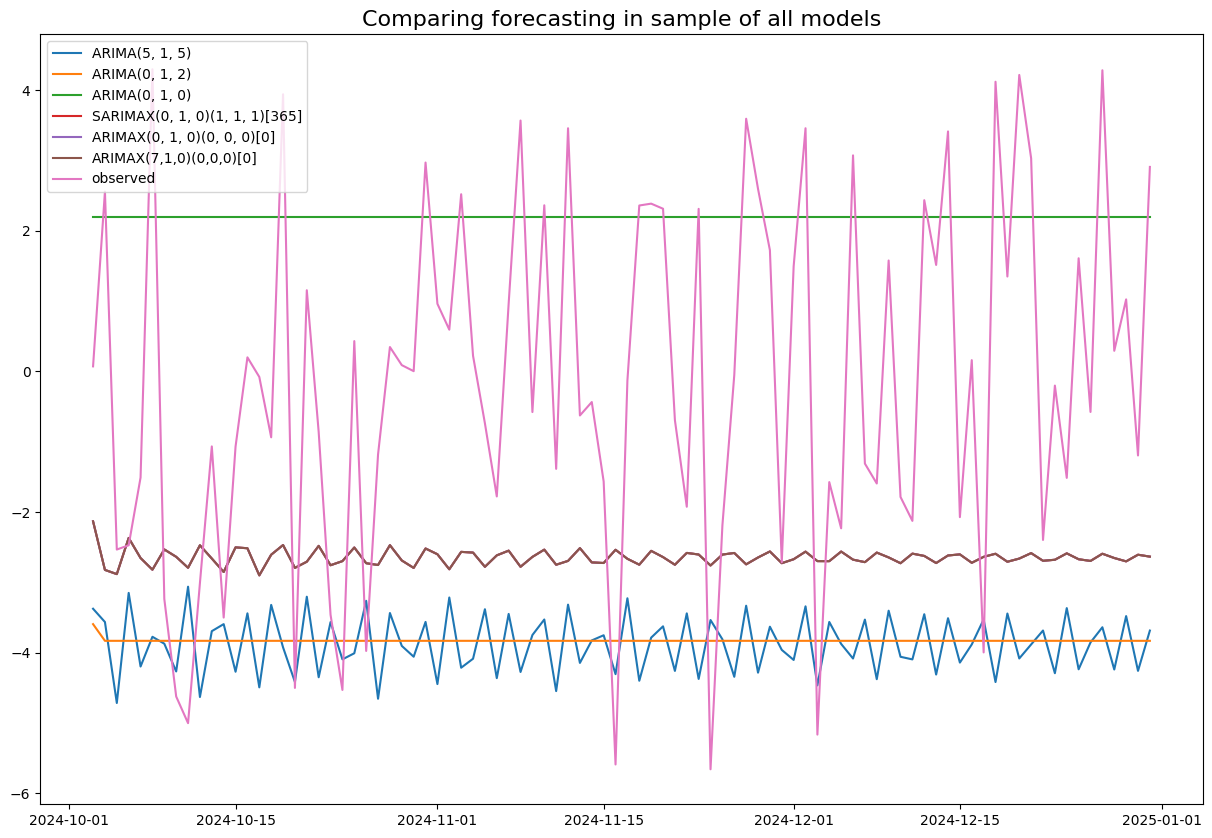

In [132]:
dates = diff_series.index
# Plot mean ARIMA and SARIMA predictions and observed
plt.figure(figsize=(15,10))
plt.title('Comparing forecasting in sample of all models', size = 16)
plt.plot(arimaA_mean.index, arimaA_mean, label='ARIMA(5, 1, 5)')
plt.plot(arimaB_mean.index, arimaB_mean, label='ARIMA(0, 1, 2)')
plt.plot(arimaO_mean.index, arimaO_mean, label='ARIMA(0, 1, 0)')
plt.plot(sarima_sx_mean.index, sarima_sx_mean, label='SARIMAX(0, 1, 0)(1, 1, 1)[365]')
plt.plot(arimax_01_mean.index, arimax_01_mean, label='ARIMAX(0, 1, 0)(0, 0, 0)[0]')
plt.plot(arimax_02_mean.index, arimax_02_mean, label='ARIMAX(7,1,0)(0,0,0)[0]')
plt.plot(diff_series[-90:], label='observed')
plt.legend()
plt.show()

In [101]:
# Create ARIMA mean forecast
arima01_pred = arimaA_results.get_forecast(steps=7)
arima01_mean = arimaA_pred.predicted_mean

In [102]:
# ARIMA predictions
arima01_mean

Date
2024-10-03   -3.374176
2024-10-04   -3.563122
2024-10-05   -4.714754
2024-10-06   -3.149130
2024-10-07   -4.196081
                ...   
2024-12-27   -3.637594
2024-12-28   -4.238547
2024-12-29   -3.478725
2024-12-30   -4.257834
2024-12-31   -3.684757
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [103]:
# Create ARIMA mean forecast
arima02_pred = arimaB_results.get_forecast(steps=7)
arima02_mean = arimaB_pred.predicted_mean

In [104]:
arima02_mean

Date
2024-10-03   -3.593281
2024-10-04   -3.830542
2024-10-05   -3.830542
2024-10-06   -3.830542
2024-10-07   -3.830542
                ...   
2024-12-27   -3.830542
2024-12-28   -3.830542
2024-12-29   -3.830542
2024-12-30   -3.830542
2024-12-31   -3.830542
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [105]:
# Create ARIMA mean forecast
arima03_pred = arimaO_results.get_forecast(steps=7)
arima03_mean = arimaO_pred.predicted_mean

In [106]:
arima03_mean

Date
2024-10-03    2.195101
2024-10-04    2.195101
2024-10-05    2.195101
2024-10-06    2.195101
2024-10-07    2.195101
                ...   
2024-12-27    2.195101
2024-12-28    2.195101
2024-12-29    2.195101
2024-12-30    2.195101
2024-12-31    2.195101
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [ ]:
# Create ARIMA mean forecast
sarima_sxpred = results_SX.get_forecast(steps=7)
sarima_sxmean = sarima_sx_pred.predicted_mean

In [108]:
sarima_sxmean

Date
2024-10-03   -2.131140
2024-10-04   -2.822116
2024-10-05   -2.881819
2024-10-06   -2.367488
2024-10-07   -2.653050
                ...   
2024-12-27   -2.591868
2024-12-28   -2.652869
2024-12-29   -2.700696
2024-12-30   -2.606084
2024-12-31   -2.633186
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [135]:
# Create ARIMA mean forecast
arimax01_pred = results_AX.get_forecast(steps=7)
arimax01_mean = arimax01_pred.predicted_mean

In [136]:
arimax01_mean

2025-01-01   -2.447552
2025-01-02   -2.744410
2025-01-03   -2.505603
2025-01-04   -2.564405
2025-01-05   -2.706664
2025-01-06   -2.502509
2025-01-07   -2.619440
Freq: D, Name: predicted_mean, dtype: float64

In [137]:
# Create ARIMA mean forecast
arimax02_pred = arimax_02_results.get_forecast(steps=7)
arimax02_mean = arimax02_pred.predicted_mean

In [138]:
arimax02_mean

2025-01-01   -2.447552
2025-01-02   -2.744410
2025-01-03   -2.505603
2025-01-04   -2.564405
2025-01-05   -2.706664
2025-01-06   -2.502509
2025-01-07   -2.619440
Freq: D, Name: predicted_mean, dtype: float64

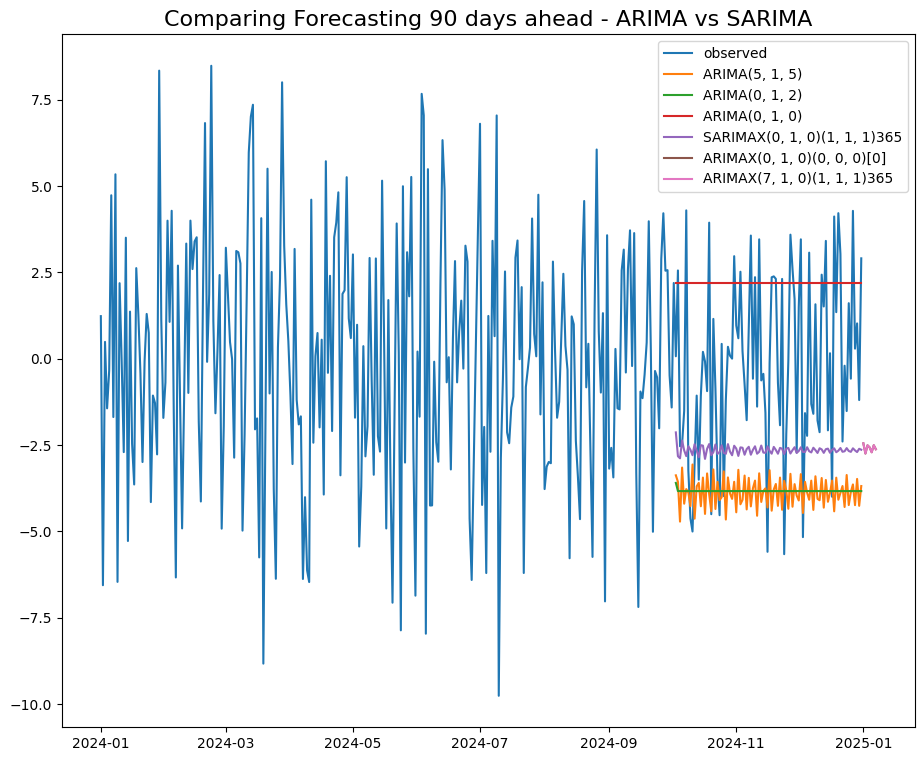

In [141]:
dates = diff_series.index
# Plot mean ARIMA and SARIMA predictions and observed
plt.title("Comparing Forecasting 90 days ahead - ARIMA vs SARIMA", size =16)
plt.plot(diff_series['2024':], label='observed')
plt.plot(arima01_mean.index, arima01_mean, label='ARIMA(5, 1, 5)')
plt.plot(arima02_mean.index, arima02_mean, label='ARIMA(0, 1, 2)')
plt.plot(arima03_mean.index, arima03_mean, label='ARIMA(0, 1, 0)')
plt.plot(sarima_sx_mean.index, sarima_sx_mean, label='SARIMAX(0, 1, 0)(1, 1, 1)365')
plt.plot(arimax01_mean.index, arimax01_mean, label='ARIMAX(0, 1, 0)(0, 0, 0)[0]')
plt.plot(arimax02_mean.index, arimax02_mean, label='ARIMAX(7, 1, 0)(1, 1, 1)365')
plt.legend()
plt.show()